In [1]:
# Data Science Tools
import bioinfokit as bik
from bioinfokit.analys import norm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.io import mmread
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde

In [2]:
# AbSeq_counts = pd.read_csv("AbSeq Molecule Counts.csv", low_memory=False,skiprows = 0)
# AbSeq_counts = AbSeq_counts.T
# AbSeq_counts.to_csv('AbSeq Molecule Counts.csv')
AbSeq_counts = pd.read_csv("AbSeq Molecule Counts.csv", low_memory=False,skiprows = 1)
AbSeq_counts = AbSeq_counts.rename(columns={'Unnamed: 0': 'Cell_Index'})
AbSeq_counts['Cell_Index'] = AbSeq_counts['Cell_Index'].str.replace('.',' ')
AbSeq_counts.set_index(['Cell_Index'], inplace=True)
AbSeq_counts.head()

CD120A-TNFRSF1A-AHS0439-pAbO  \
Cell_Index                                                        
Group_PBMCs_Sample_PBMCs 1_3794                               4   
Group_PBMCs_Sample_PBMCs 1_54922                             13   
Group_PBMCs_Sample_PBMCs 1_68296                              4   
Group_PBMCs_Sample_PBMCs 1_97680                              3   
Group_PBMCs_Sample_PBMCs 1_121103                             8   

                                   CD120b-TNFRSF1B-AHS0421-pAbO  \
Cell_Index                                                        
Group_PBMCs_Sample_PBMCs 1_3794                              44   
Group_PBMCs_Sample_PBMCs 1_54922                            380   
Group_PBMCs_Sample_PBMCs 1_68296                            208   
Group_PBMCs_Sample_PBMCs 1_97680                             70   
Group_PBMCs_Sample_PBMCs 1_121103                            97   

                                   CD14:MPHIP9-CD14-AHS0037-pAbO  \
Cell_Index                                                         
Group_PBMCs_Sample_PBMCs 1_3794                                0   
Group_PBMCs_Sample_PBMCs 1_54922                              30   
Group_PBMCs_Sample_PBMCs 1_68296                               0   
Group_PBMCs_Sample_PBMCs 1_97680                               2   
Group_PBMCs_Sample_PBMCs 1_121103                              8   

                                   CD16:B73.1-FCGR3A-FCGR3B-AHS0242-pAbO  \
Cell_Index                                                                 
Group_PBMCs_Sample_PBMCs 1_3794                                        7   
Group_PBMCs_Sample_PBMCs 1_54922                                    2395   
Group_PBMCs_Sample_PBMCs 1_68296                                     386   
Group_PBMCs_Sample_PBMCs 1_97680                                     573   
Group_PBMCs_Sample_PBMCs 1_121103                                    121   

                                   CD19:HIB19-CD19-AHS0161-pAbO  \
Cell_Index                                                        
Group_PBMCs_Sample_PBMCs 1_3794                               9   
Group_PBMCs_Sample_PBMCs 1_54922                              7   
Group_PBMCs_Sample_PBMCs 1_68296                             10   
Group_PBMCs_Sample_PBMCs 1_97680                              6   
Group_PBMCs_Sample_PBMCs 1_121103                             8   

                                   CD45RA:HI100-PTPRC-AHS0009-pAbO  \
Cell_Index                                                           
Group_PBMCs_Sample_PBMCs 1_3794                                524   
Group_PBMCs_Sample_PBMCs 1_54922                               574   
Group_PBMCs_Sample_PBMCs 1_68296                               202   
Group_PBMCs_Sample_PBMCs 1_97680                               163   
Group_PBMCs_Sample_PBMCs 1_121103                               91   

                                   CD45RO-PTPRC-AHS0036-pAbO  \
Cell_Index                                                     
Group_PBMCs_Sample_PBMCs 1_3794                            4   
Group_PBMCs_Sample_PBMCs 1_54922                          11   
Group_PBMCs_Sample_PBMCs 1_68296                           2   
Group_PBMCs_Sample_PBMCs 1_97680                           5   
Group_PBMCs_Sample_PBMCs 1_121103                          8   

                                   CD4:SK3-CD4-AHS0032-pAbO  \
Cell_Index                                                    
Group_PBMCs_Sample_PBMCs 1_3794                          13   
Group_PBMCs_Sample_PBMCs 1_54922                        505   
Group_PBMCs_Sample_PBMCs 1_68296                         20   
Group_PBMCs_Sample_PBMCs 1_97680                         20   
Group_PBMCs_Sample_PBMCs 1_121103                        10   

                                   CD56:NCAM16.2-NCAM1-AHS0019-pAbO  \
Cell_Index                                                            
Group_PBMCs_Sample_PBMCs 1_3794                                   1   
Group_PBMCs_Sample_P

In [3]:
AUC = pd.read_csv("Cellular Response to TNFa AUC.csv", low_memory=False)
AUC = AUC.rename(columns={'Unnamed: 0': 'Cell_Index', 'geneSet' : 'AUC TNFa'})
AUC.set_index(['Cell_Index'], inplace=True)
AUC.head()

AUC TNFa
Cell_Index                                 
Group_PBMCs_Sample_PBMCs 1_3794    0.075993
Group_PBMCs_Sample_PBMCs 1_54922   0.209374
Group_PBMCs_Sample_PBMCs 1_68296   0.019589
Group_PBMCs_Sample_PBMCs 1_97680   0.103553
Group_PBMCs_Sample_PBMCs 1_121103  0.067298

In [4]:
PEX = pd.read_csv("Protein Expression.csv", low_memory=False)
PEX = PEX.rename(columns={'Unnamed: 0': 'Cell_Index', 
                          'TNFR1-TNFRSF1A-AHS0439-pAbO' : 'TNFR1',
                          'TNFR2-TNFRSF1B-AHS0421-pAbO' : 'TNFR2'})
PEX.set_index(['Cell_Index'], inplace=True)
PEX = PEX[['TNFR1','TNFR2']]
PEX.head()

TNFR1     TNFR2
Cell_Index                                           
Group_PBMCs_Sample_PBMCs 1_3794    0.207382  1.262706
Group_PBMCs_Sample_PBMCs 1_54922   0.187793  1.951409
Group_PBMCs_Sample_PBMCs 1_68296   0.122942  2.054452
Group_PBMCs_Sample_PBMCs 1_97680   0.121024  1.386767
Group_PBMCs_Sample_PBMCs 1_121103  0.204117  1.320582

In [14]:
PEX['TNFR1'].describe()

count    31101.000000
mean         0.205022
std          0.161449
min          0.000000
25%          0.092529
50%          0.179314
75%          0.283805
max          2.223204
Name: TNFR1, dtype: float64

In [15]:
PEX['TNFR2'].describe()

count    31101.000000
mean         0.961399
std          0.598050
min          0.000000
25%          0.502000
50%          0.843573
75%          1.299668
max          4.746892
Name: TNFR2, dtype: float64

In [16]:
Meta = pd.read_csv("Meta Data.csv", low_memory=False)
Meta = Meta.rename(columns={'Unnamed: 0': 'Cell_Index', 
                          'CellType' : 'Cell Type'})
Meta.set_index(['Cell_Index'], inplace=True)
Meta = Meta[['Cell Type','Group','Sample']]
Meta.head()

Cell Type  Group   Sample
Cell_Index                                                              
Group_PBMCs_Sample_PBMCs 1_3794        CD8 Naïve T-Cells  PBMCs  PBMCs 1
Group_PBMCs_Sample_PBMCs 1_54922   Non-Classic Monocytes  PBMCs  PBMCs 1
Group_PBMCs_Sample_PBMCs 1_68296     CD16bright NK-cells  PBMCs  PBMCs 1
Group_PBMCs_Sample_PBMCs 1_97680     CD16bright NK-cells  PBMCs  PBMCs 1
Group_PBMCs_Sample_PBMCs 1_121103    CD16bright NK-cells  PBMCs  PBMCs 1

In [17]:
ta = pd.merge(AUC,PEX,how='inner',left_index=True, right_index=True)
ta = pd.merge(ta,Meta,how='inner',left_index=True, right_index=True)
ta

AUC TNFa     TNFR1  \
Cell_Index                                                               
Group_PBMCs_Sample_PBMCs 1_3794                     0.075993  0.207382   
Group_PBMCs_Sample_PBMCs 1_54922                    0.209374  0.187793   
Group_PBMCs_Sample_PBMCs 1_68296                    0.019589  0.122942   
Group_PBMCs_Sample_PBMCs 1_97680                    0.103553  0.121024   
Group_PBMCs_Sample_PBMCs 1_121103                   0.067298  0.204117   
...                                                      ...       ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.012459  0.126410   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.048364  0.106357   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.042894  0.179907   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.069542  0.000000   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.057246  0.220901   

                                                       TNFR2  \
Cell_Index                                                     
Group_PBMCs_Sample_PBMCs 1_3794                     1.262706   
Group_PBMCs_Sample_PBMCs 1_54922                    1.951409   
Group_PBMCs_Sample_PBMCs 1_68296                    2.054452   
Group_PBMCs_Sample_PBMCs 1_97680                    1.386767   
Group_PBMCs_Sample_PBMCs 1_121103                   1.320582   
...                                                      ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.575791   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.202482   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.524653   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.406314   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.666598   

                                                                Cell Type  \
Cell_Index                                                                  
Group_PBMCs_Sample_PBMCs 1_3794                         CD8 Naïve T-Cells   
Group_PBMCs_Sample_PBMCs 1_54922                    Non-Classic Monocytes   
Group_PBMCs_Sample_PBMCs 1_68296                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_97680                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_121103                     CD16bright NK-cells   
...                                                                   ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...      CD8 Naïve T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                B-cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...          CD8 NKT-cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   

                                                              Group  \
Cell_Index                                                            
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs   
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_68296                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_97680                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_121103                             PBMCs   
...                                                             ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   

                                                               Sample  
Cell_Index                                                             
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_68296          

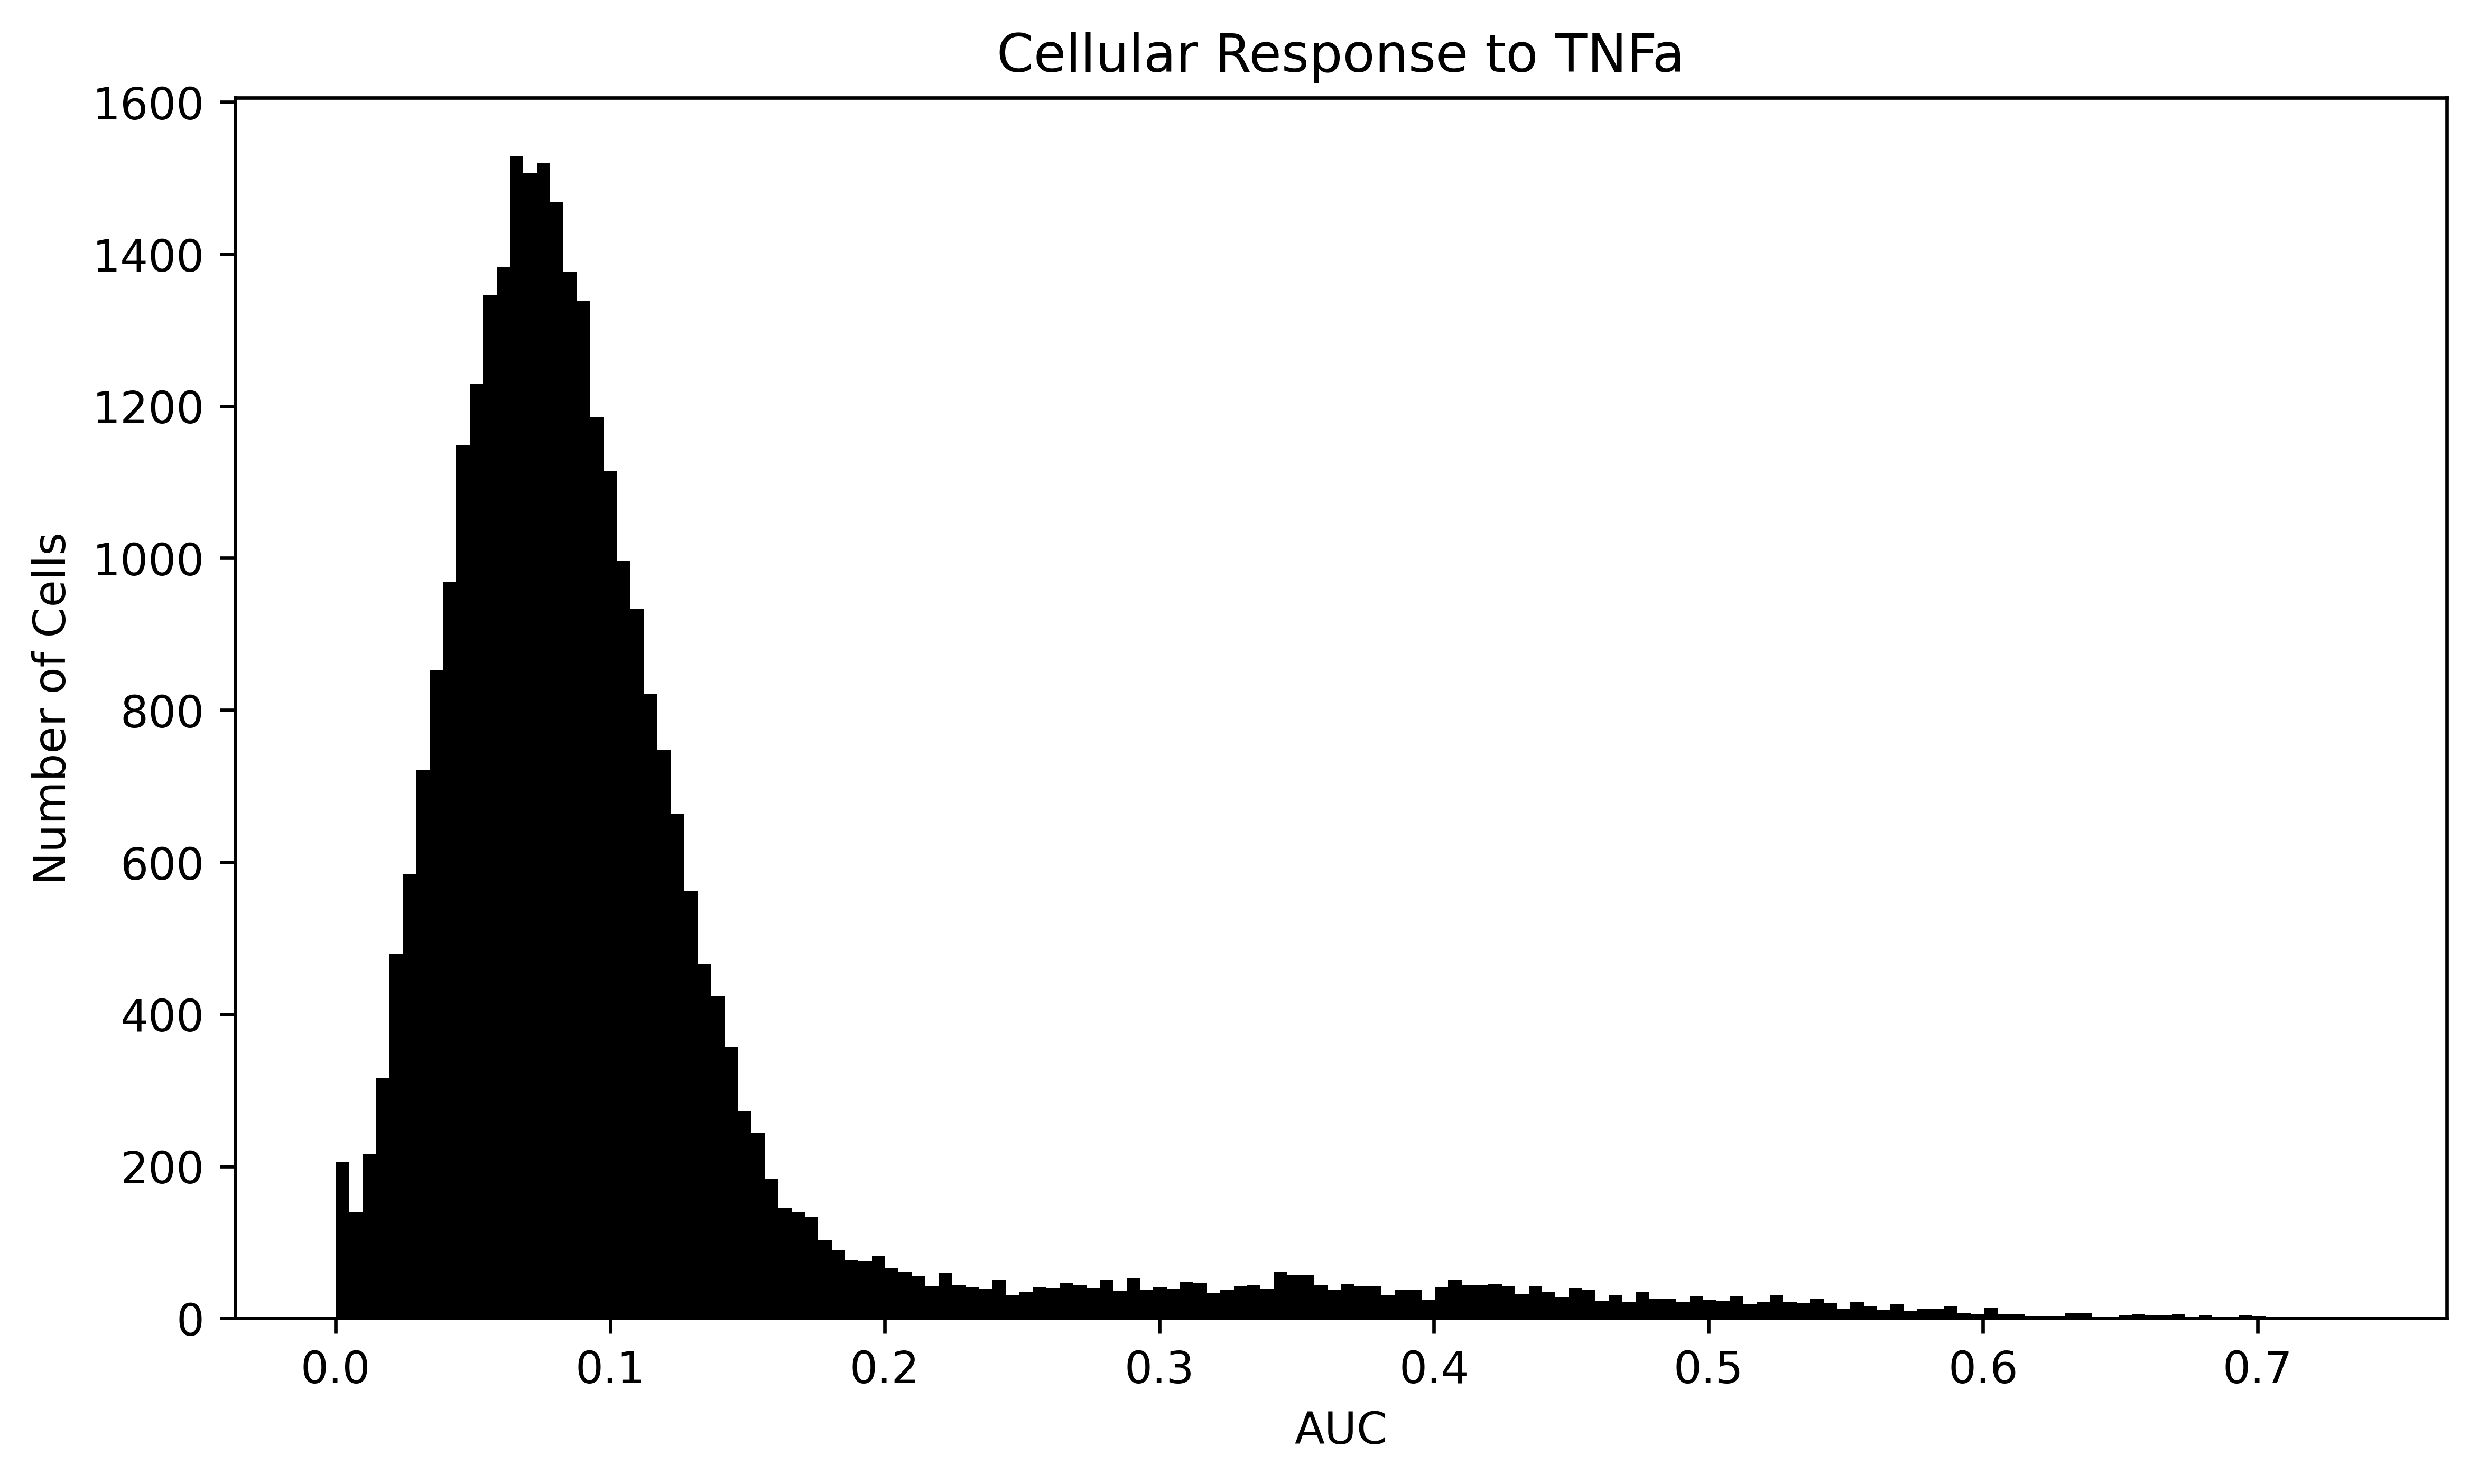

In [18]:
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('Cellular Response to TNFa')
plt.hist(ta['AUC TNFa'], n_bins, color='black')
plt.xlabel('AUC')
plt.ylabel('Number of Cells')
plt.show()

In [19]:
ta = ta[ta['AUC TNFa'] >= 0.01]
ta

AUC TNFa     TNFR1  \
Cell_Index                                                               
Group_PBMCs_Sample_PBMCs 1_3794                     0.075993  0.207382   
Group_PBMCs_Sample_PBMCs 1_54922                    0.209374  0.187793   
Group_PBMCs_Sample_PBMCs 1_68296                    0.019589  0.122942   
Group_PBMCs_Sample_PBMCs 1_97680                    0.103553  0.121024   
Group_PBMCs_Sample_PBMCs 1_121103                   0.067298  0.204117   
...                                                      ...       ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.012459  0.126410   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.048364  0.106357   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.042894  0.179907   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.069542  0.000000   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.057246  0.220901   

                                                       TNFR2  \
Cell_Index                                                     
Group_PBMCs_Sample_PBMCs 1_3794                     1.262706   
Group_PBMCs_Sample_PBMCs 1_54922                    1.951409   
Group_PBMCs_Sample_PBMCs 1_68296                    2.054452   
Group_PBMCs_Sample_PBMCs 1_97680                    1.386767   
Group_PBMCs_Sample_PBMCs 1_121103                   1.320582   
...                                                      ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.575791   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.202482   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.524653   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.406314   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.666598   

                                                                Cell Type  \
Cell_Index                                                                  
Group_PBMCs_Sample_PBMCs 1_3794                         CD8 Naïve T-Cells   
Group_PBMCs_Sample_PBMCs 1_54922                    Non-Classic Monocytes   
Group_PBMCs_Sample_PBMCs 1_68296                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_97680                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_121103                     CD16bright NK-cells   
...                                                                   ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...      CD8 Naïve T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                B-cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...          CD8 NKT-cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   

                                                              Group  \
Cell_Index                                                            
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs   
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_68296                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_97680                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_121103                             PBMCs   
...                                                             ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   

                                                               Sample  
Cell_Index                                                             
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_68296          

/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_47173/2944921389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta['AUC TNFa'] = (ta['AUC TNFa'] - ta['AUC TNFa'].min()) / (ta['AUC TNFa'].max() - ta['AUC TNFa'].min())


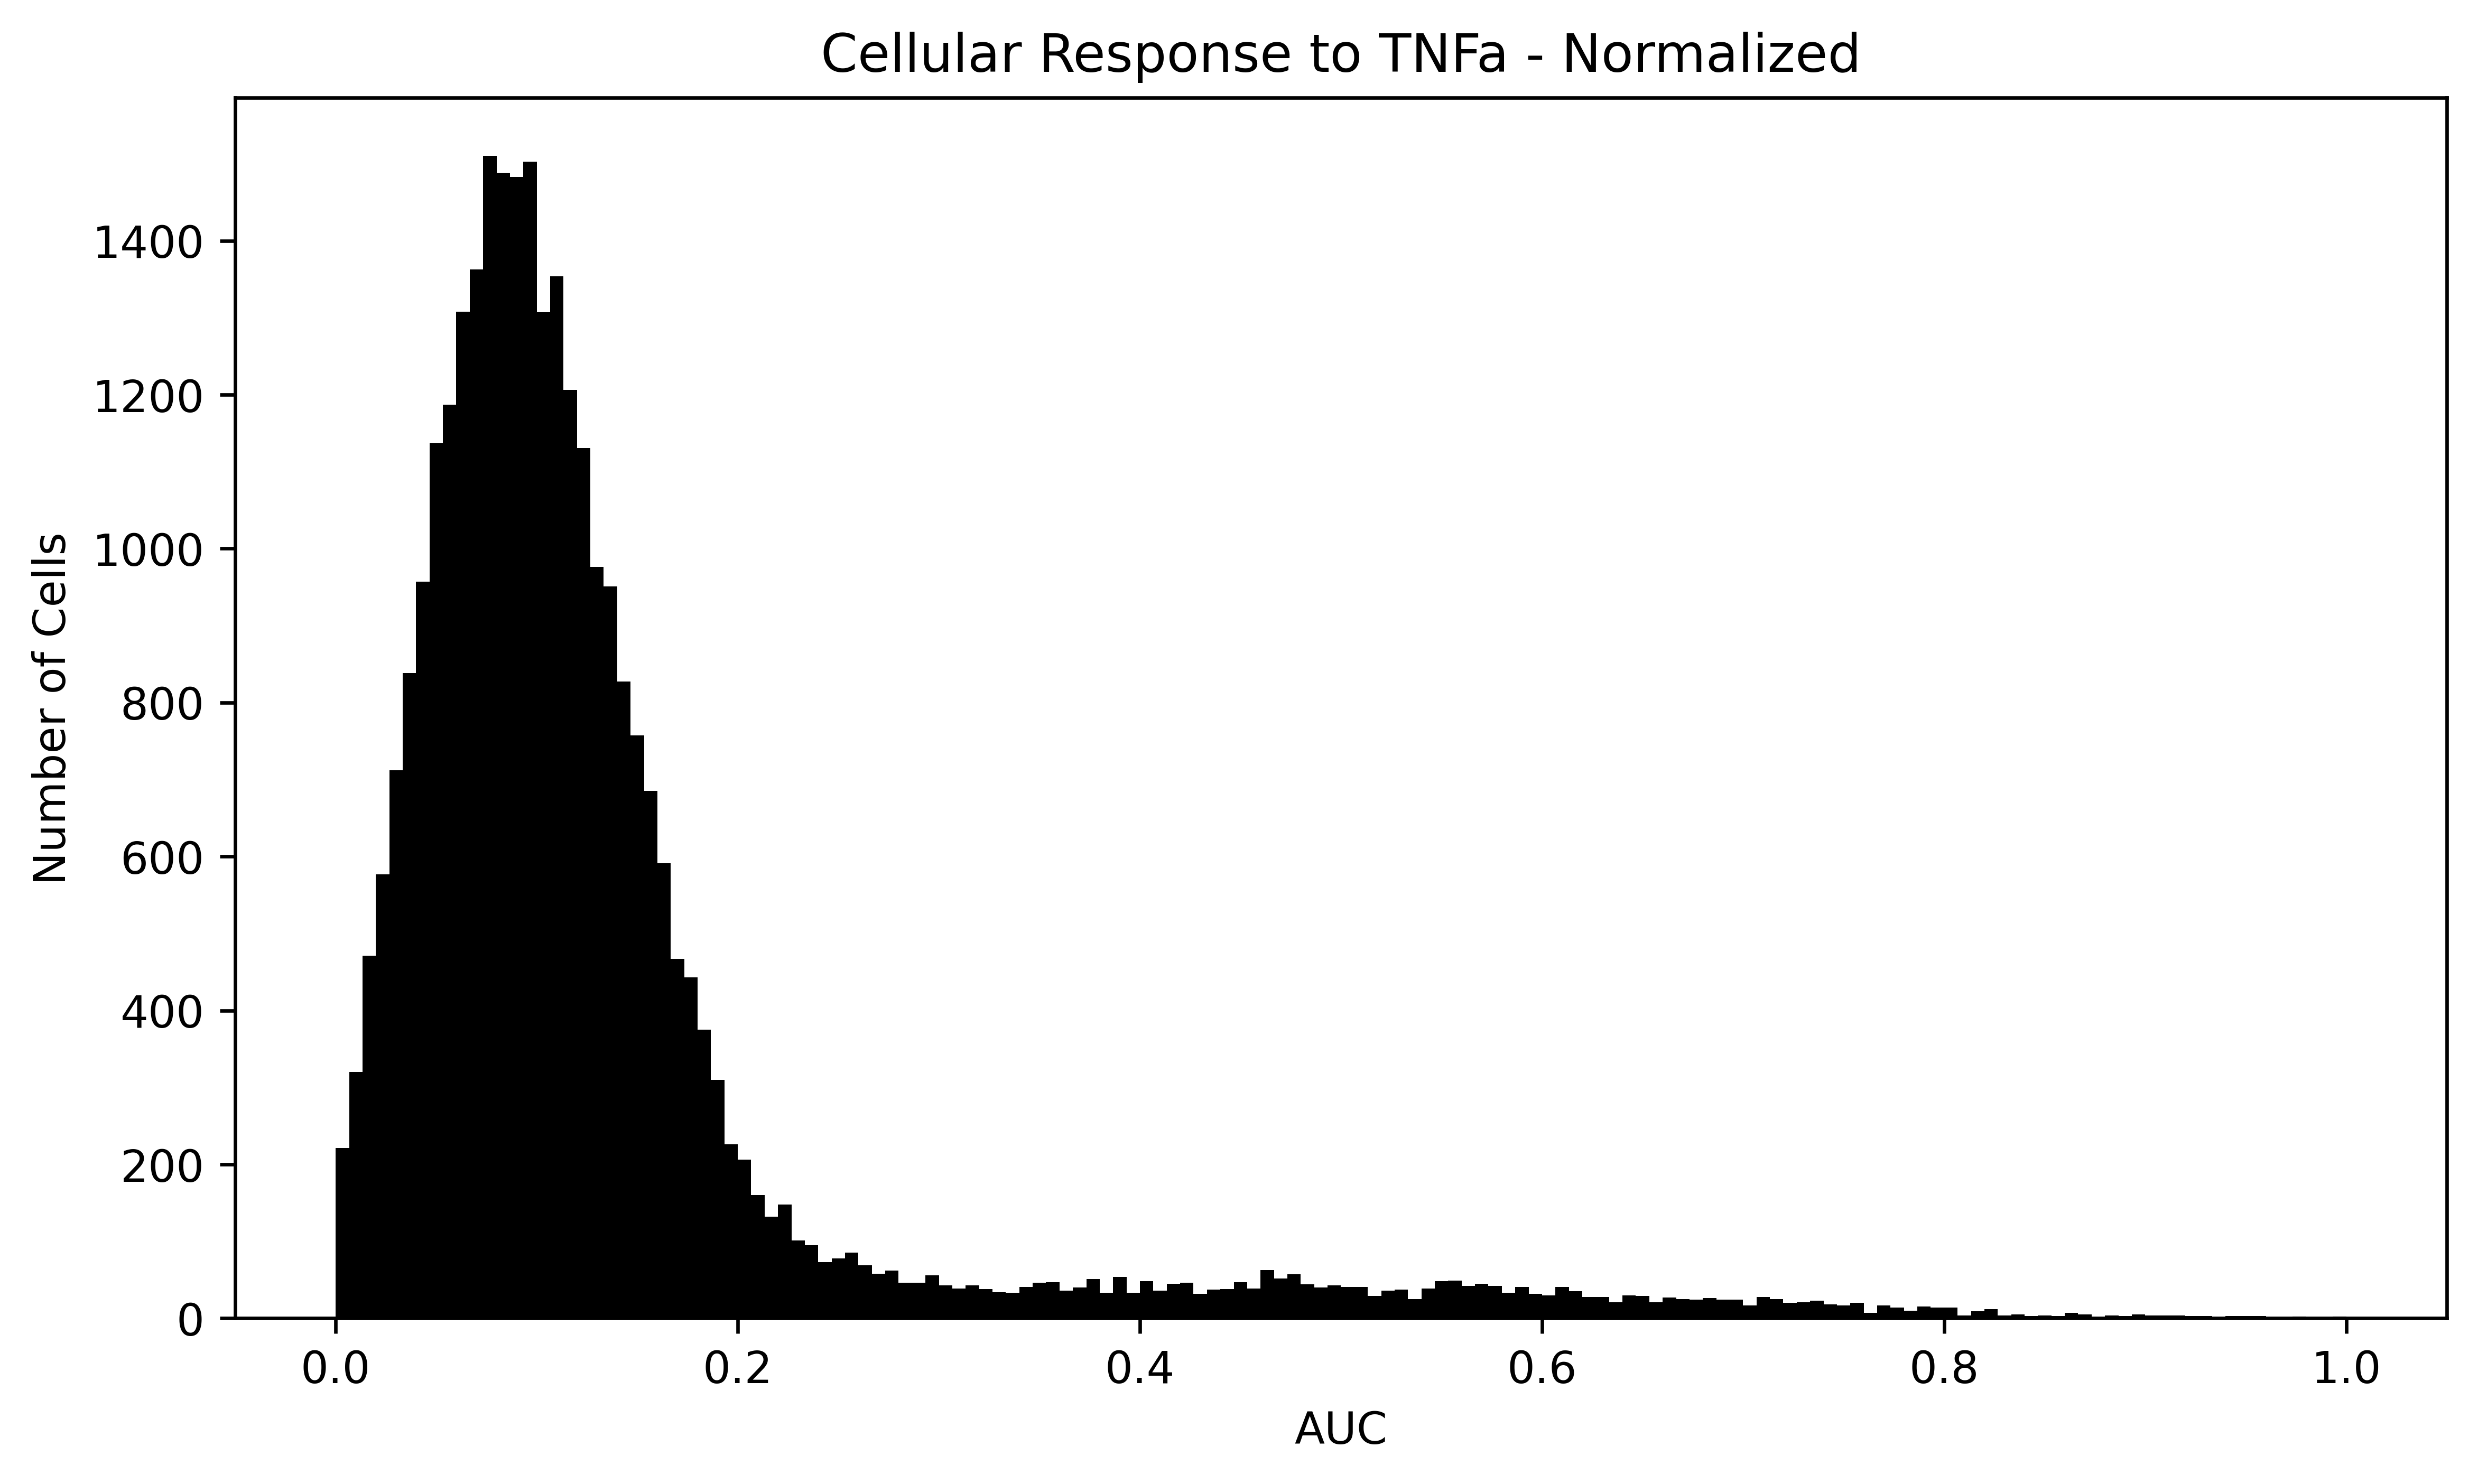

In [20]:
ta['AUC TNFa'] = (ta['AUC TNFa'] - ta['AUC TNFa'].min()) / (ta['AUC TNFa'].max() - ta['AUC TNFa'].min())
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('Cellular Response to TNFa - Normalized')
plt.hist(ta['AUC TNFa'], n_bins, color='black')
plt.xlabel('AUC')
plt.ylabel('Number of Cells')
plt.show()

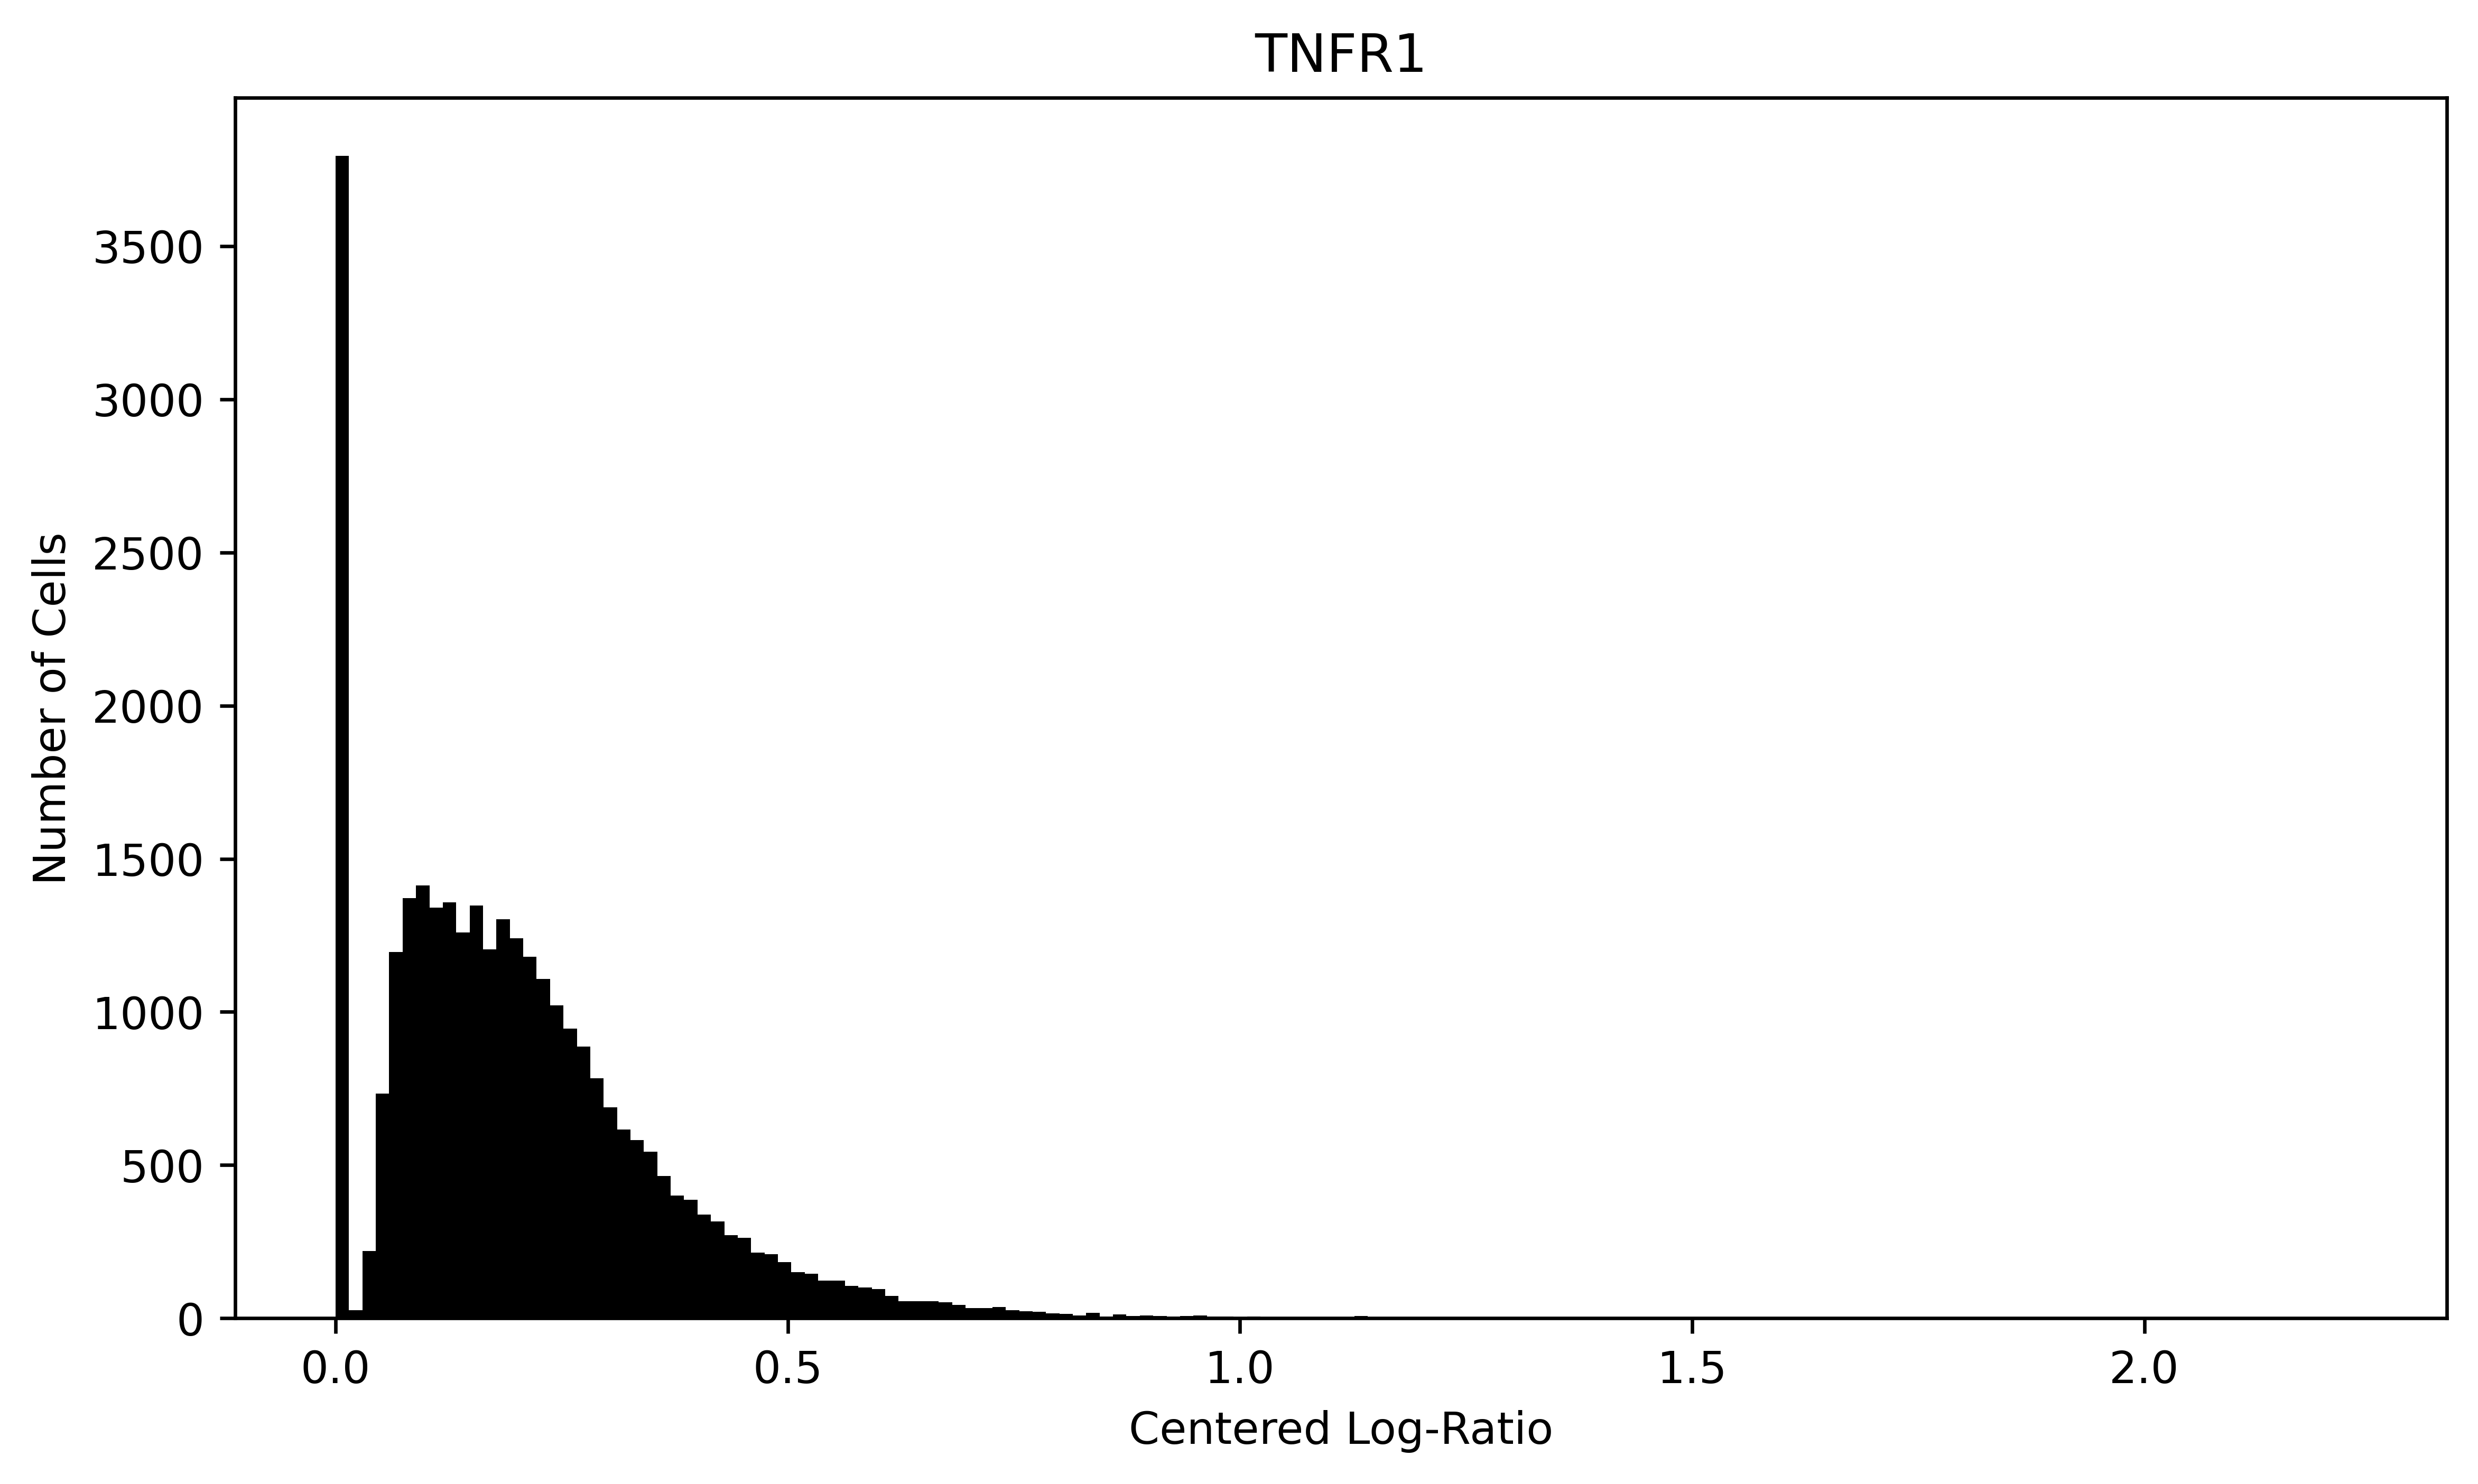

In [21]:
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('TNFR1')
plt.hist(ta['TNFR1'], n_bins, color='black')
plt.xlabel('Centered Log-Ratio')
plt.ylabel('Number of Cells')
plt.show()

In [22]:
ta = ta[ta['TNFR1'] > 0]
ta

AUC TNFa     TNFR1  \
Cell_Index                                                               
Group_PBMCs_Sample_PBMCs 1_3794                     0.091300  0.207382   
Group_PBMCs_Sample_PBMCs 1_54922                    0.275973  0.187793   
Group_PBMCs_Sample_PBMCs 1_68296                    0.013205  0.122942   
Group_PBMCs_Sample_PBMCs 1_97680                    0.129458  0.121024   
Group_PBMCs_Sample_PBMCs 1_121103                   0.079261  0.204117   
...                                                      ...       ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.097353  0.154667   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.003334  0.126410   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.053046  0.106357   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.045472  0.179907   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.065344  0.220901   

                                                       TNFR2  \
Cell_Index                                                     
Group_PBMCs_Sample_PBMCs 1_3794                     1.262706   
Group_PBMCs_Sample_PBMCs 1_54922                    1.951409   
Group_PBMCs_Sample_PBMCs 1_68296                    2.054452   
Group_PBMCs_Sample_PBMCs 1_97680                    1.386767   
Group_PBMCs_Sample_PBMCs 1_121103                   1.320582   
...                                                      ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.288585   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.575791   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.202482   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.524653   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.666598   

                                                                Cell Type  \
Cell_Index                                                                  
Group_PBMCs_Sample_PBMCs 1_3794                         CD8 Naïve T-Cells   
Group_PBMCs_Sample_PBMCs 1_54922                    Non-Classic Monocytes   
Group_PBMCs_Sample_PBMCs 1_68296                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_97680                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_121103                     CD16bright NK-cells   
...                                                                   ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD4 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...      CD8 Naïve T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                B-cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   

                                                              Group  \
Cell_Index                                                            
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs   
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_68296                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_97680                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_121103                             PBMCs   
...                                                             ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   

                                                               Sample  
Cell_Index                                                             
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_68296          

In [23]:
ta = ta[ta['TNFR1'] < 1]
ta

AUC TNFa     TNFR1  \
Cell_Index                                                               
Group_PBMCs_Sample_PBMCs 1_3794                     0.091300  0.207382   
Group_PBMCs_Sample_PBMCs 1_54922                    0.275973  0.187793   
Group_PBMCs_Sample_PBMCs 1_68296                    0.013205  0.122942   
Group_PBMCs_Sample_PBMCs 1_97680                    0.129458  0.121024   
Group_PBMCs_Sample_PBMCs 1_121103                   0.079261  0.204117   
...                                                      ...       ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.097353  0.154667   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.003334  0.126410   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.053046  0.106357   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.045472  0.179907   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.065344  0.220901   

                                                       TNFR2  \
Cell_Index                                                     
Group_PBMCs_Sample_PBMCs 1_3794                     1.262706   
Group_PBMCs_Sample_PBMCs 1_54922                    1.951409   
Group_PBMCs_Sample_PBMCs 1_68296                    2.054452   
Group_PBMCs_Sample_PBMCs 1_97680                    1.386767   
Group_PBMCs_Sample_PBMCs 1_121103                   1.320582   
...                                                      ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.288585   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.575791   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.202482   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.524653   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.666598   

                                                                Cell Type  \
Cell_Index                                                                  
Group_PBMCs_Sample_PBMCs 1_3794                         CD8 Naïve T-Cells   
Group_PBMCs_Sample_PBMCs 1_54922                    Non-Classic Monocytes   
Group_PBMCs_Sample_PBMCs 1_68296                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_97680                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_121103                     CD16bright NK-cells   
...                                                                   ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD4 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...      CD8 Naïve T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                B-cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   

                                                              Group  \
Cell_Index                                                            
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs   
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_68296                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_97680                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_121103                             PBMCs   
...                                                             ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   

                                                               Sample  
Cell_Index                                                             
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_68296          

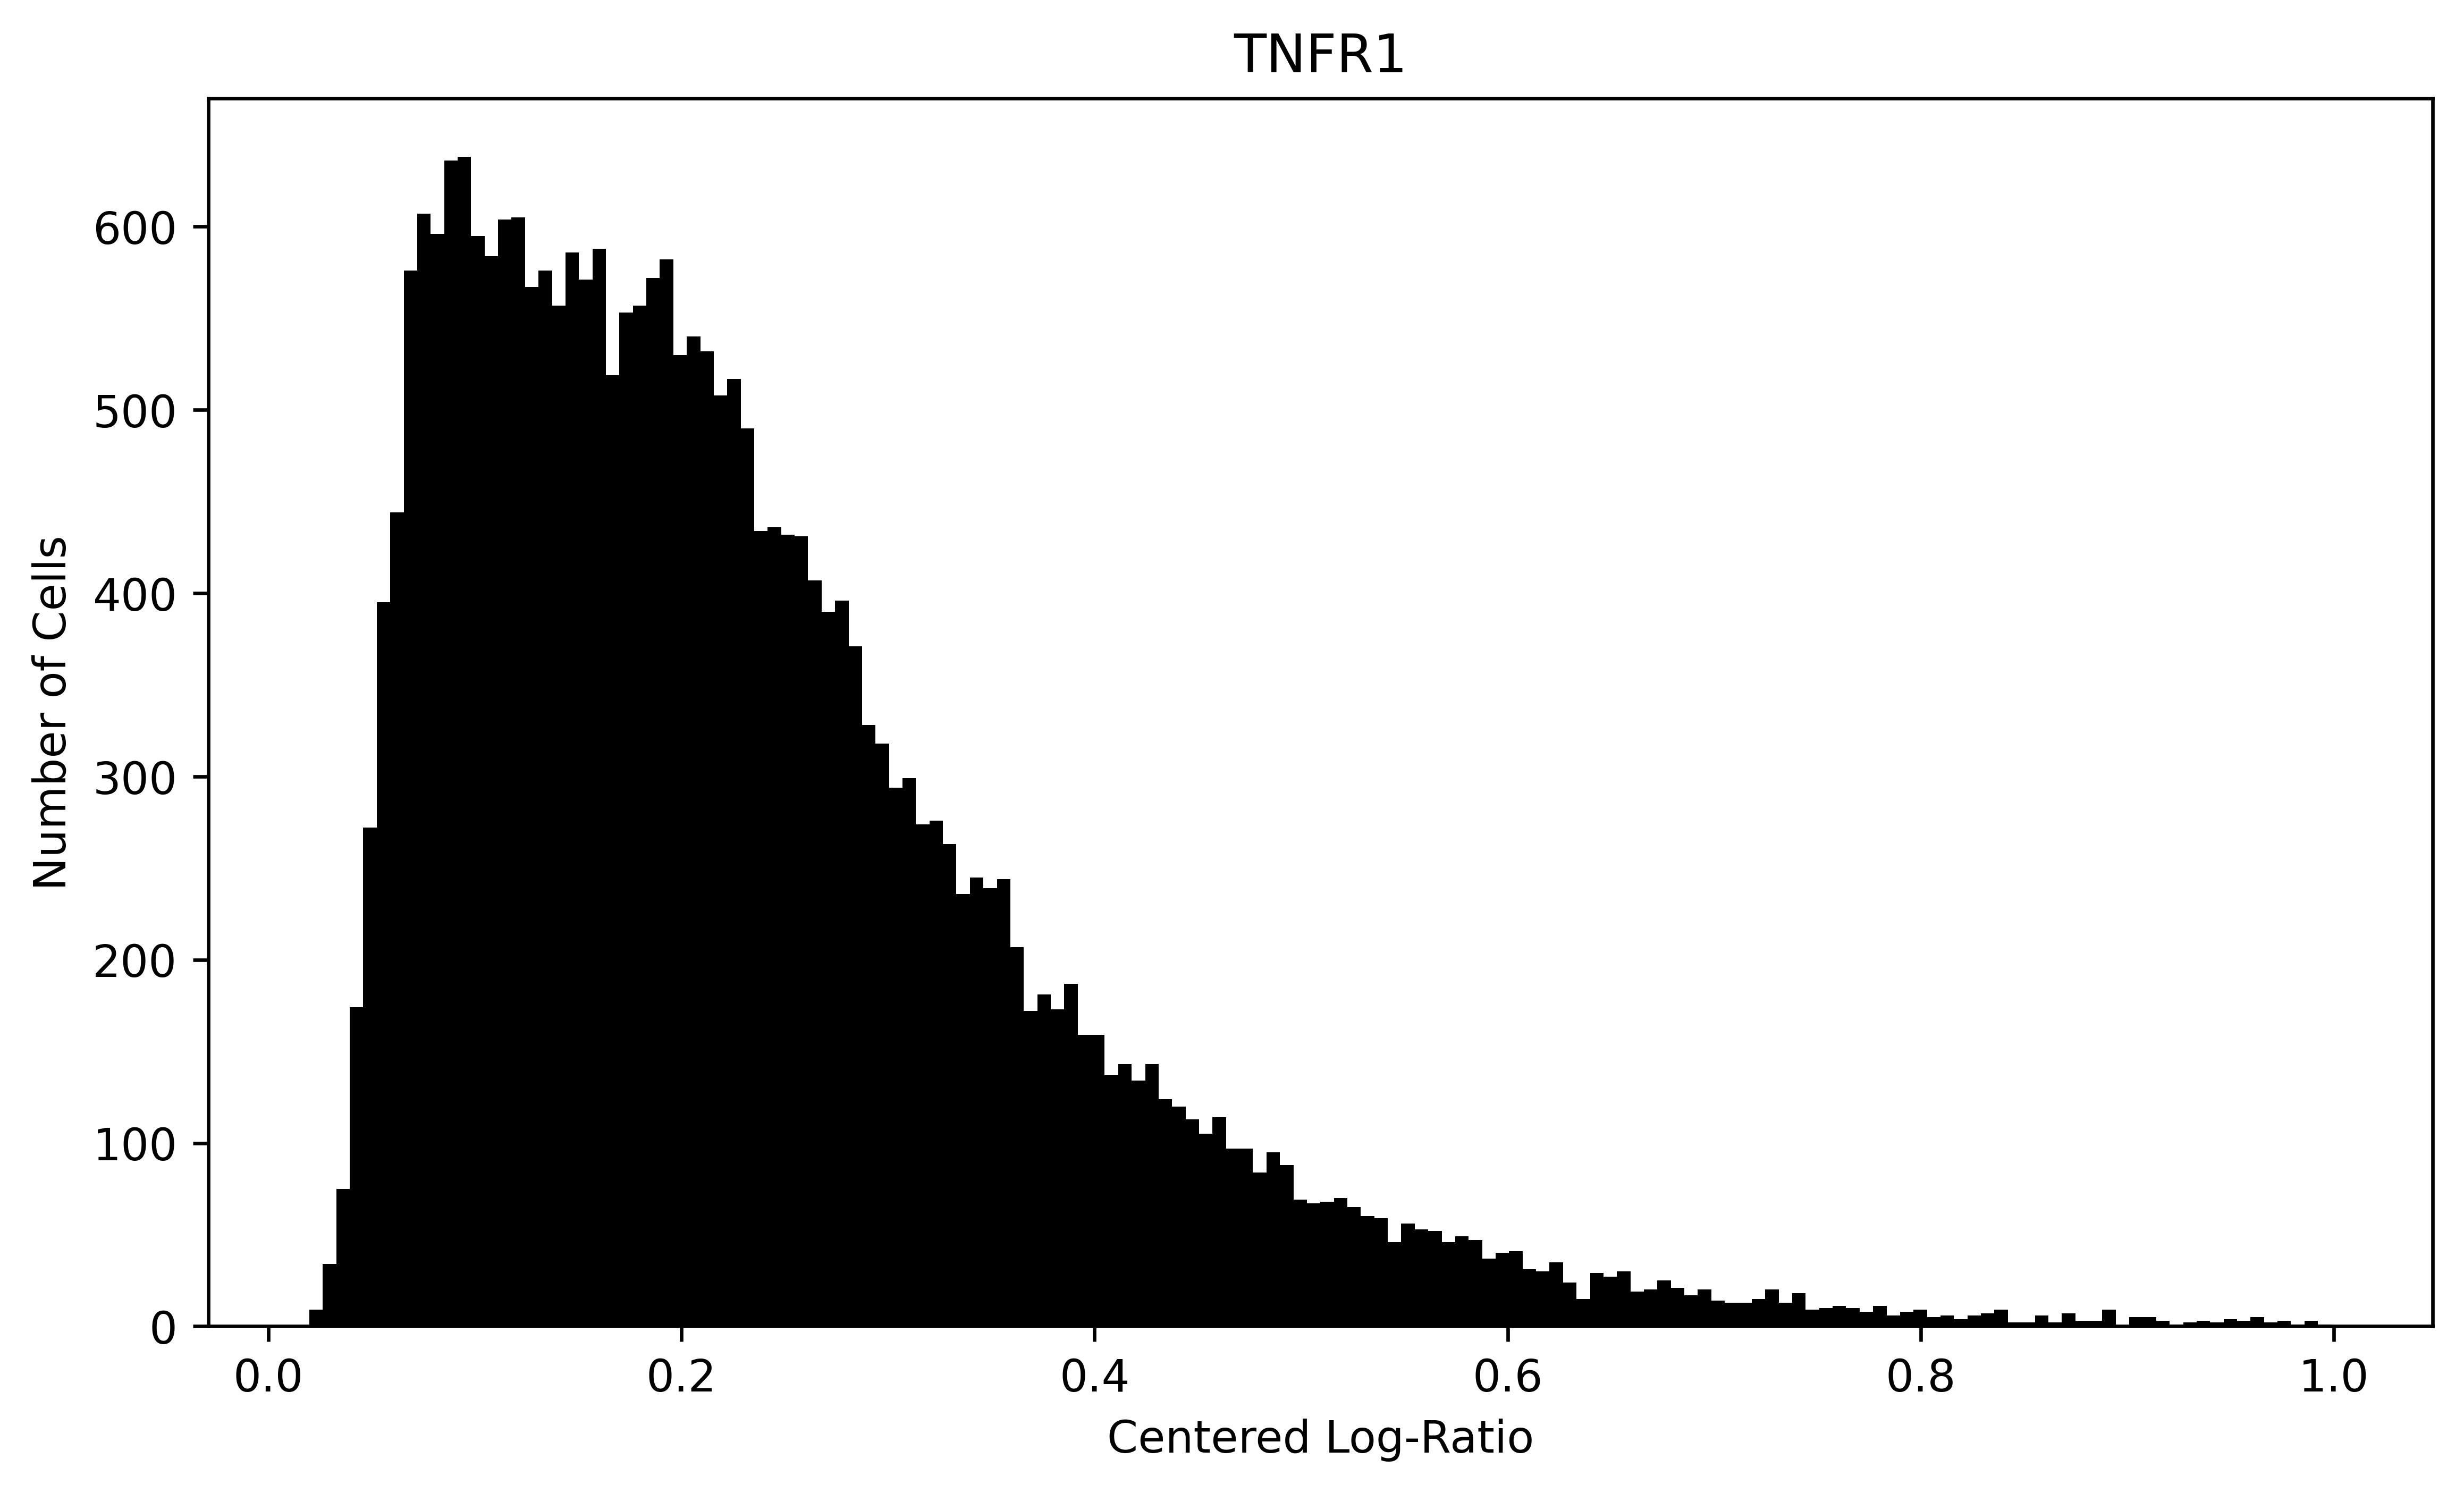

In [24]:
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('TNFR1')
plt.hist(ta['TNFR1'], n_bins, color='black')
plt.xlabel('Centered Log-Ratio')
plt.ylabel('Number of Cells')
plt.show()

/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_47173/2760686347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta['TNFR1'] = (ta['TNFR1'] - ta['TNFR1'].min()) / (ta['TNFR1'].max() - ta['TNFR1'].min())


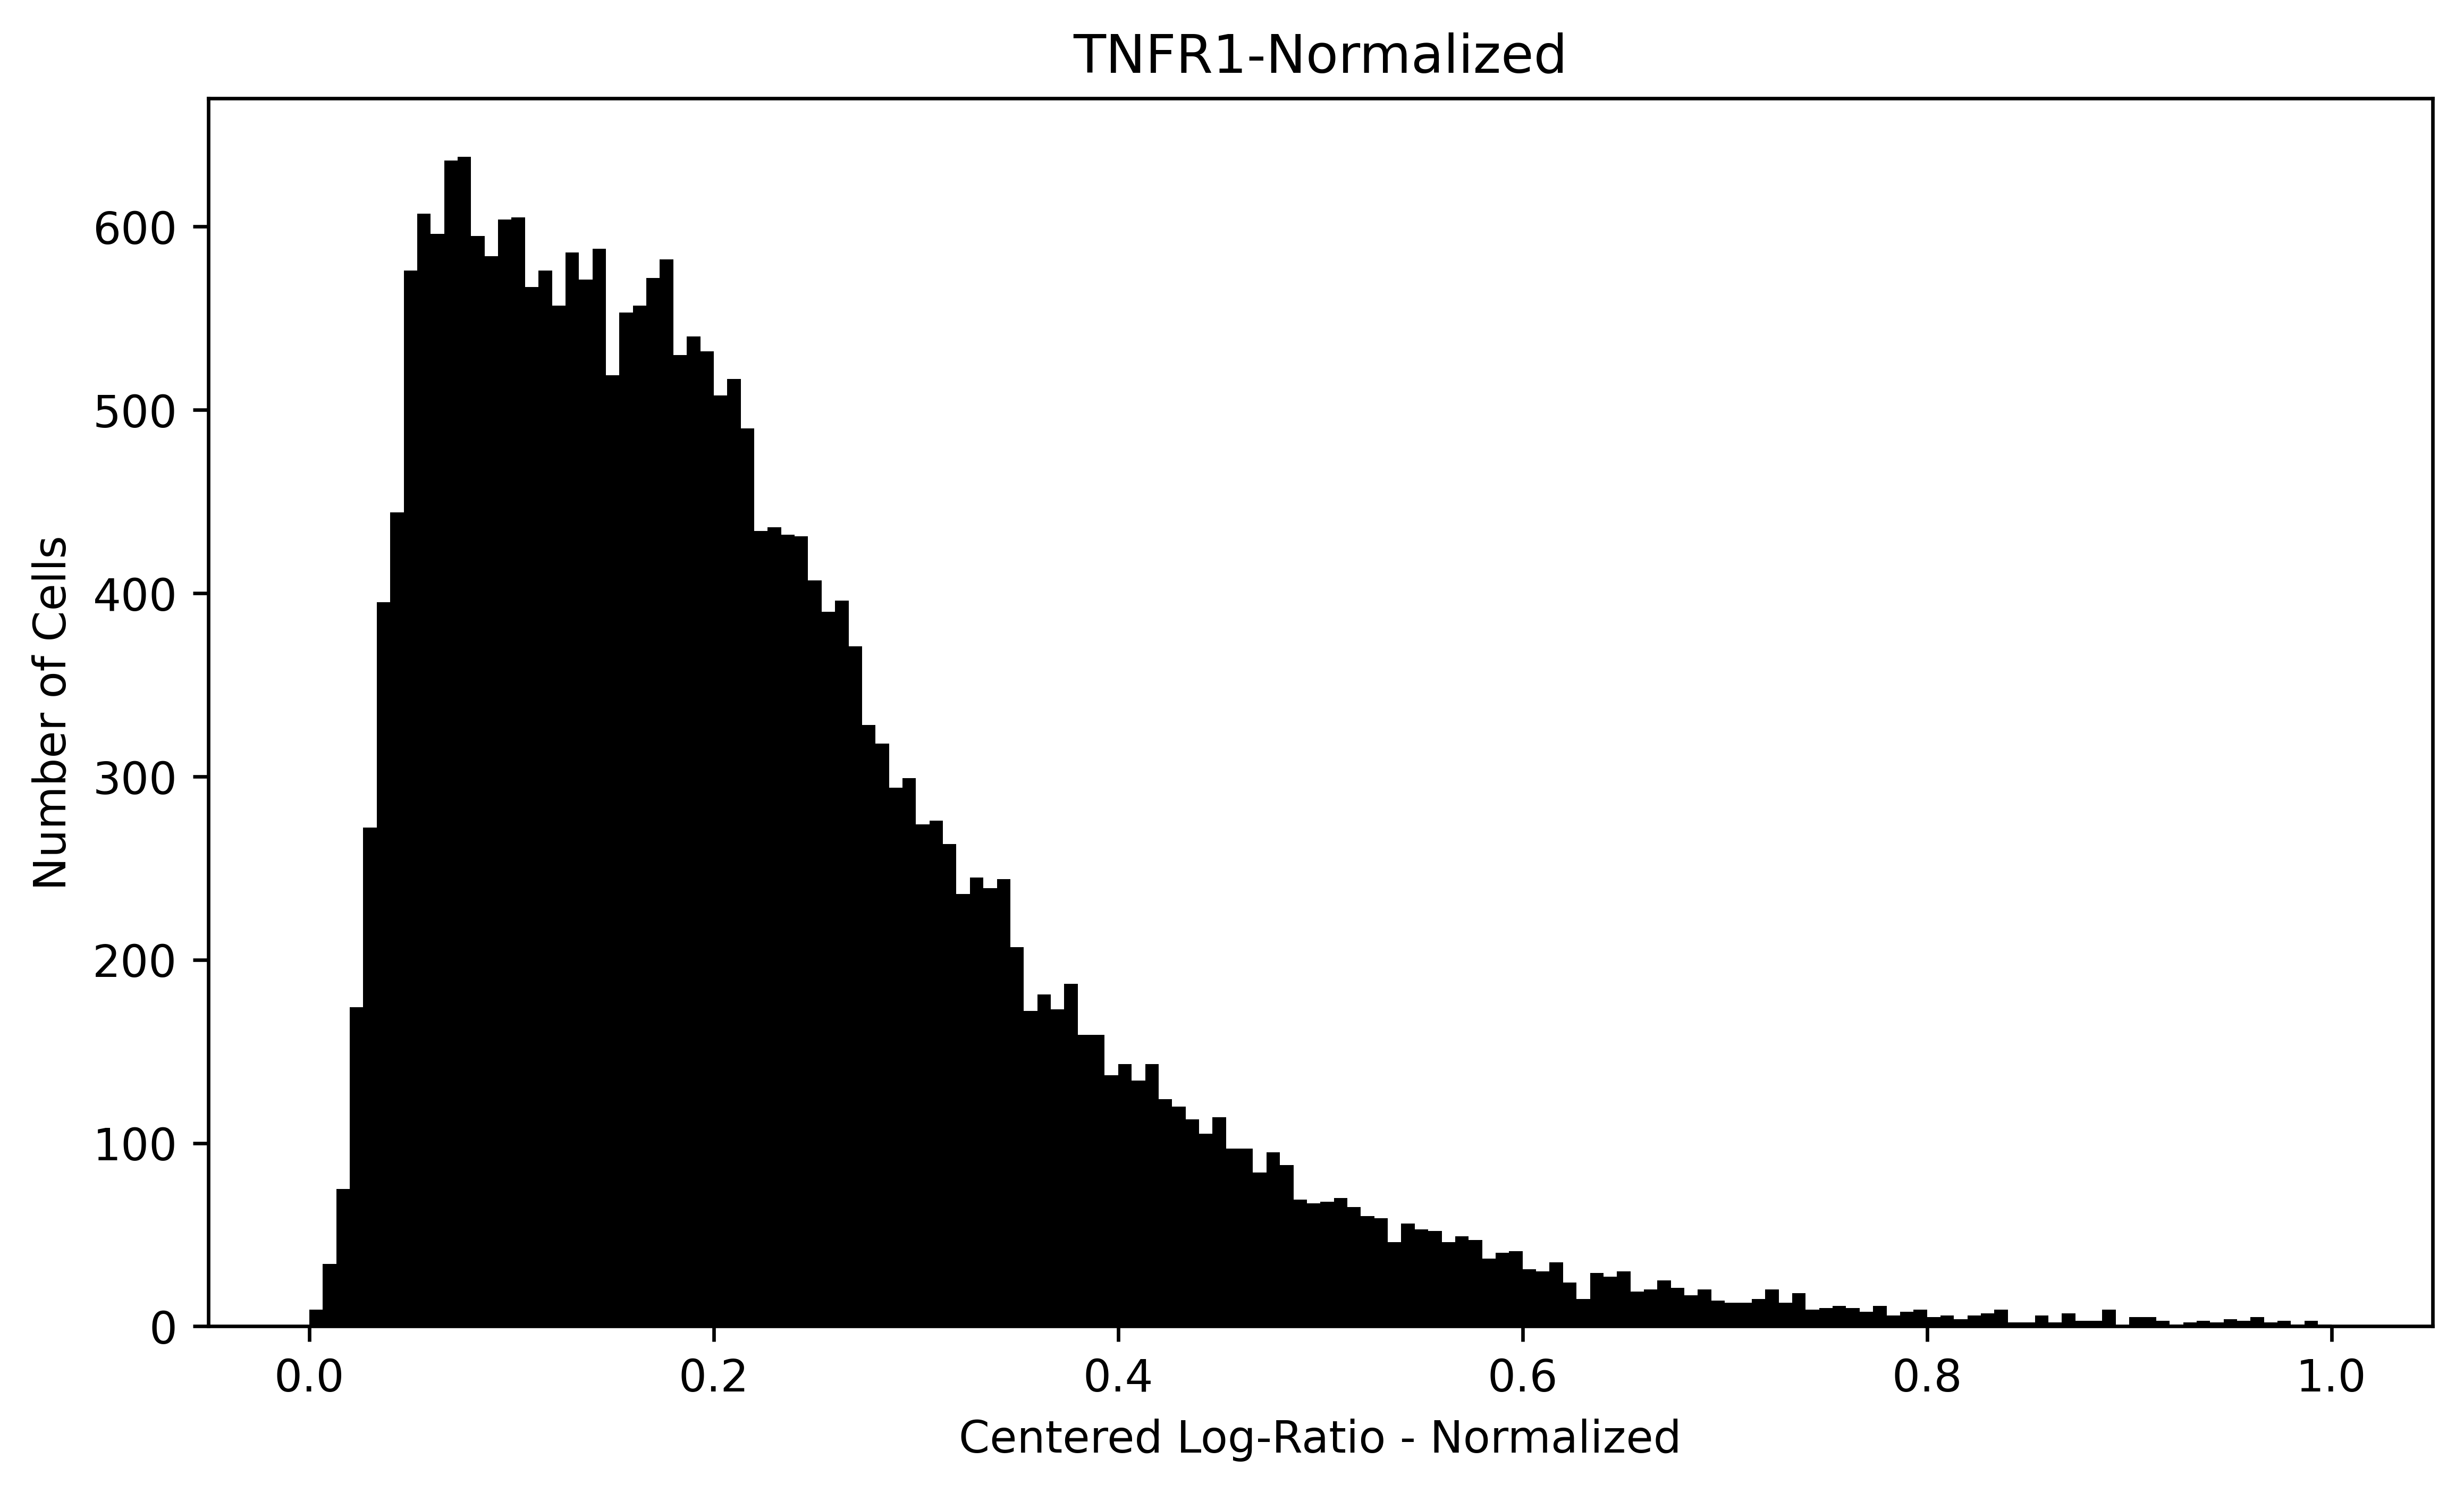

In [25]:
ta['TNFR1'] = (ta['TNFR1'] - ta['TNFR1'].min()) / (ta['TNFR1'].max() - ta['TNFR1'].min())
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('TNFR1-Normalized')
plt.hist(ta['TNFR1'], n_bins, color='black')
plt.xlabel('Centered Log-Ratio - Normalized')
plt.ylabel('Number of Cells')
plt.show()

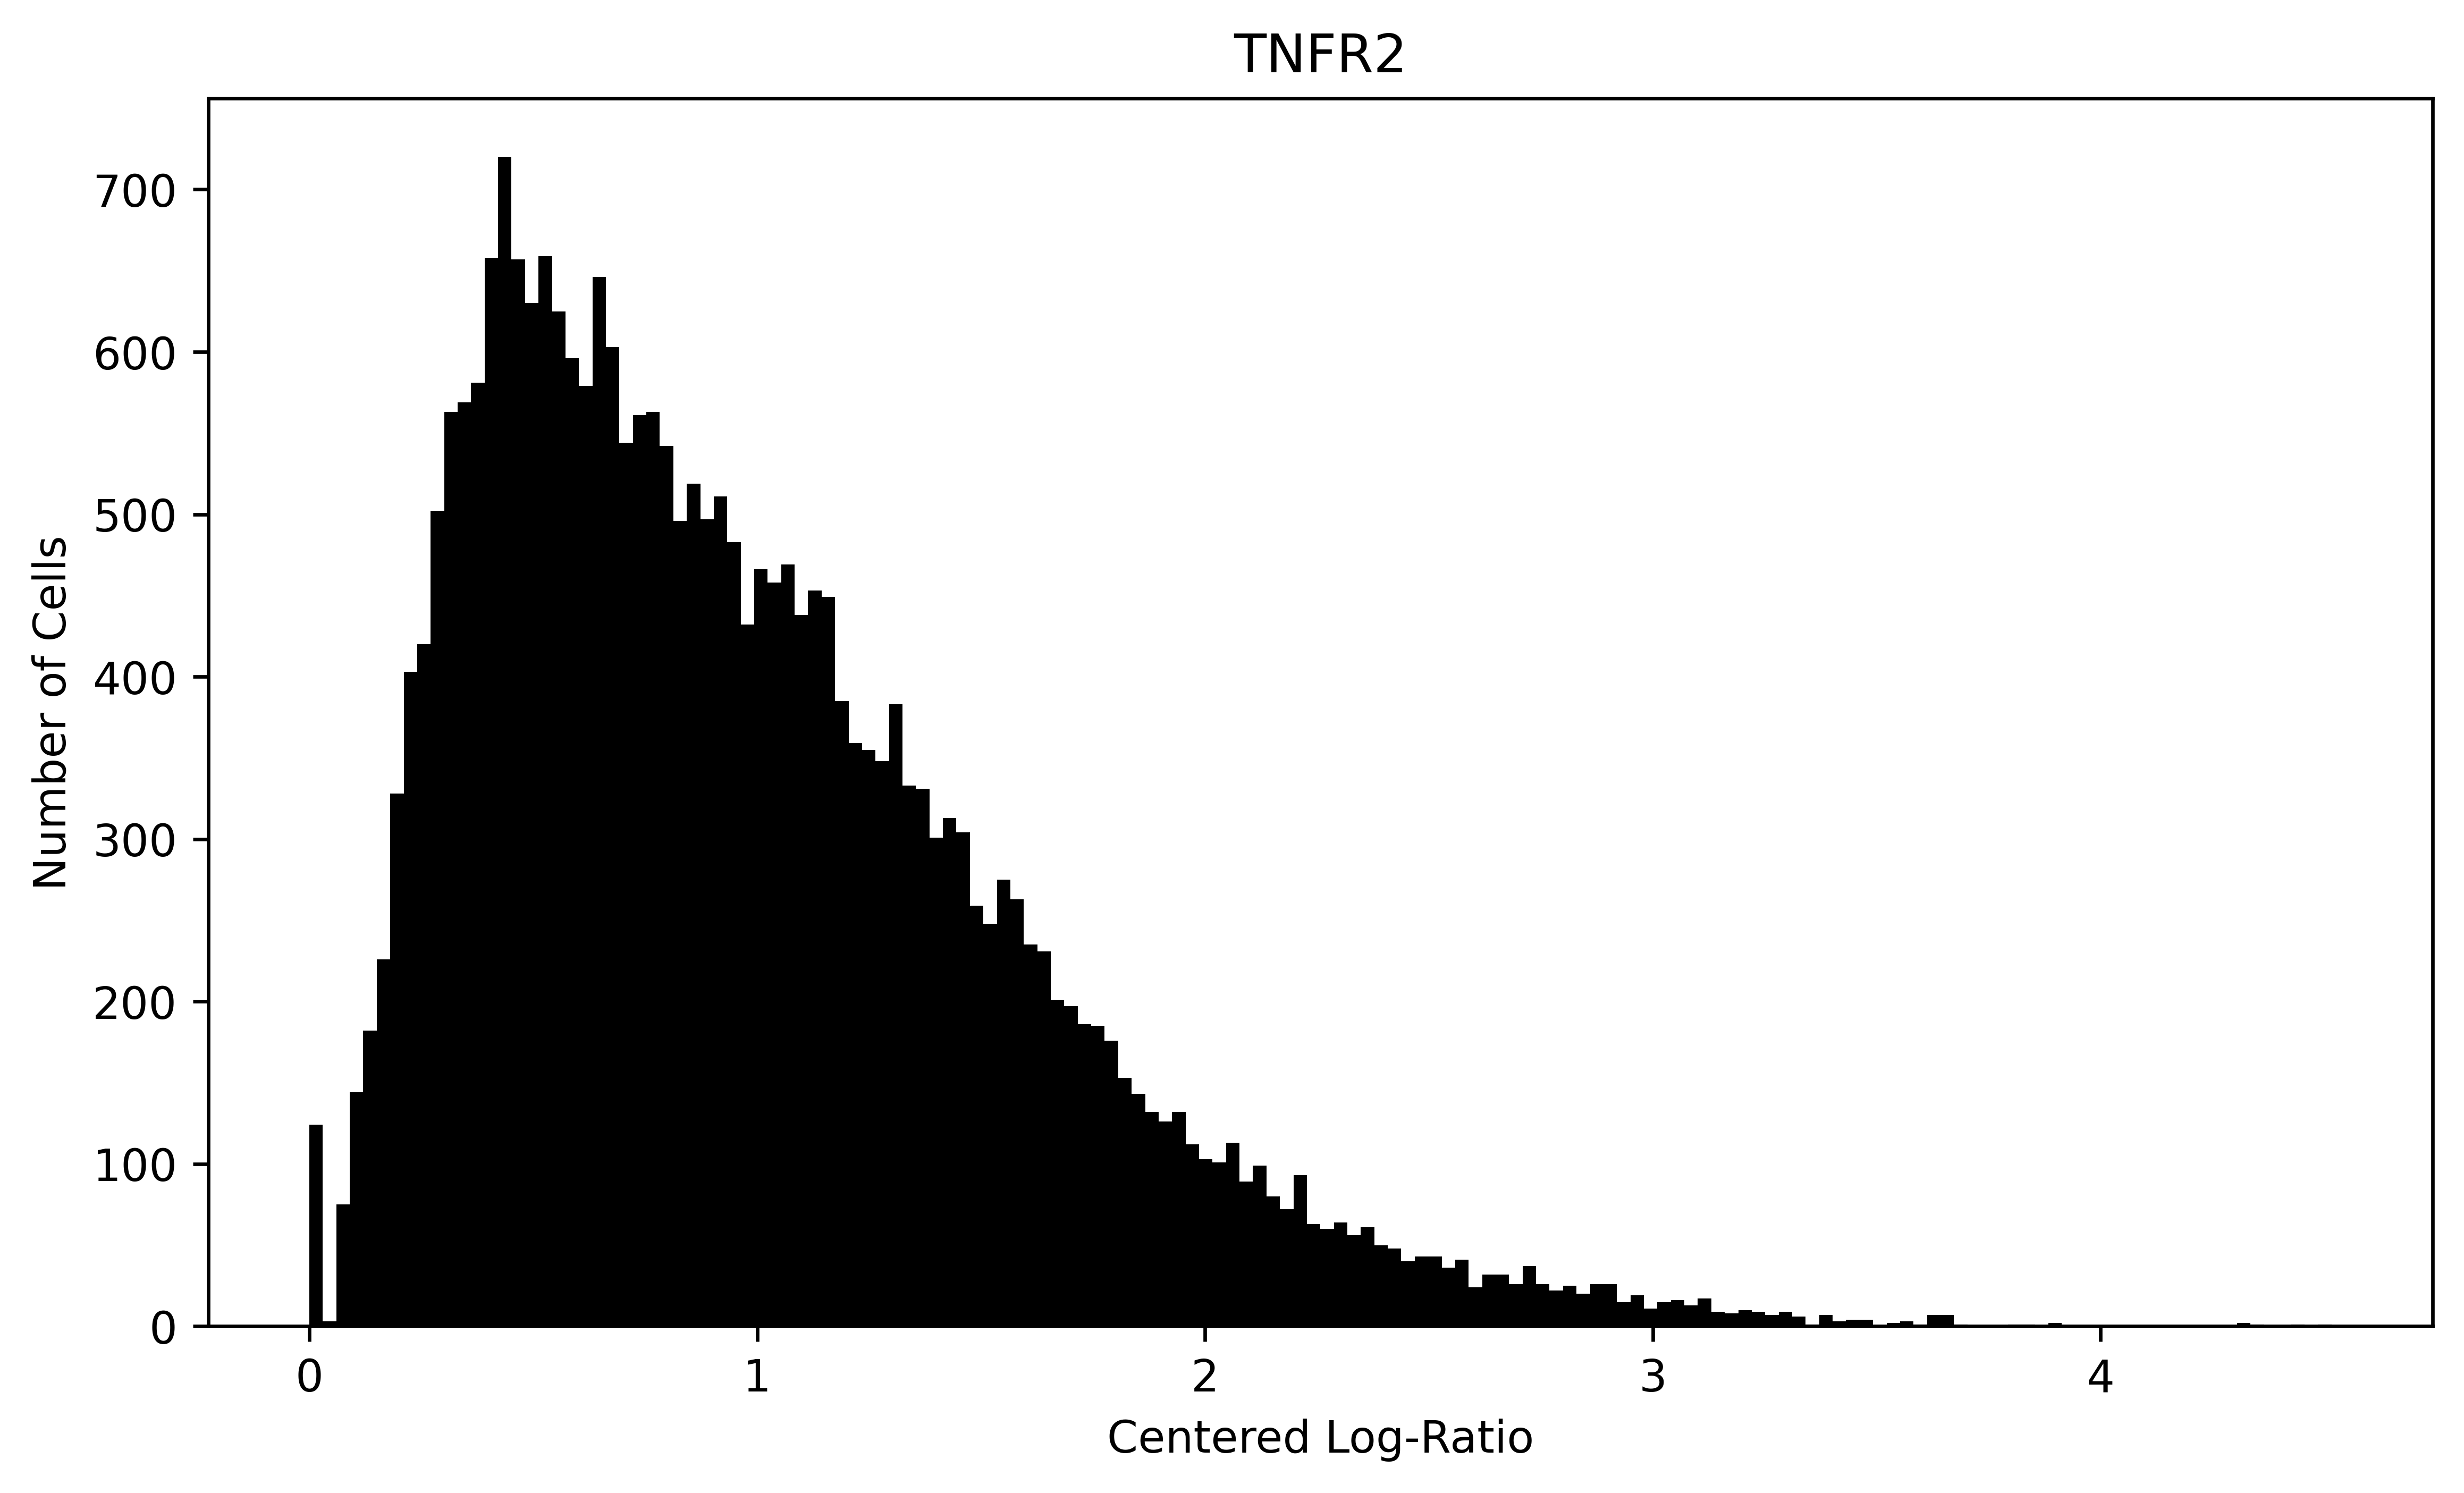

In [26]:
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('TNFR2')
plt.hist(ta['TNFR2'], n_bins, color='black')
plt.xlabel('Centered Log-Ratio')
plt.ylabel('Number of Cells')
plt.show()

In [27]:
ta = ta[ta['TNFR2'] < 4]
ta

AUC TNFa     TNFR1  \
Cell_Index                                                               
Group_PBMCs_Sample_PBMCs 1_3794                     0.091300  0.191593   
Group_PBMCs_Sample_PBMCs 1_54922                    0.275973  0.171584   
Group_PBMCs_Sample_PBMCs 1_68296                    0.013205  0.105344   
Group_PBMCs_Sample_PBMCs 1_97680                    0.129458  0.103386   
Group_PBMCs_Sample_PBMCs 1_121103                   0.079261  0.188258   
...                                                      ...       ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.097353  0.137749   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.003334  0.108886   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.053046  0.088404   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.045472  0.163530   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.065344  0.205402   

                                                       TNFR2  \
Cell_Index                                                     
Group_PBMCs_Sample_PBMCs 1_3794                     1.262706   
Group_PBMCs_Sample_PBMCs 1_54922                    1.951409   
Group_PBMCs_Sample_PBMCs 1_68296                    2.054452   
Group_PBMCs_Sample_PBMCs 1_97680                    1.386767   
Group_PBMCs_Sample_PBMCs 1_121103                   1.320582   
...                                                      ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.288585   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.575791   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.202482   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.524653   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.666598   

                                                                Cell Type  \
Cell_Index                                                                  
Group_PBMCs_Sample_PBMCs 1_3794                         CD8 Naïve T-Cells   
Group_PBMCs_Sample_PBMCs 1_54922                    Non-Classic Monocytes   
Group_PBMCs_Sample_PBMCs 1_68296                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_97680                      CD16bright NK-cells   
Group_PBMCs_Sample_PBMCs 1_121103                     CD16bright NK-cells   
...                                                                   ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD4 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...      CD8 Naïve T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                B-cells   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...     CD8 Memory T-Cells   

                                                              Group  \
Cell_Index                                                            
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs   
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_68296                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_97680                              PBMCs   
Group_PBMCs_Sample_PBMCs 1_121103                             PBMCs   
...                                                             ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  PBMCs RA + TNFa   

                                                               Sample  
Cell_Index                                                             
Group_PBMCs_Sample_PBMCs 1_3794                               PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_54922                              PBMCs 1  
Group_PBMCs_Sample_PBMCs 1_68296          

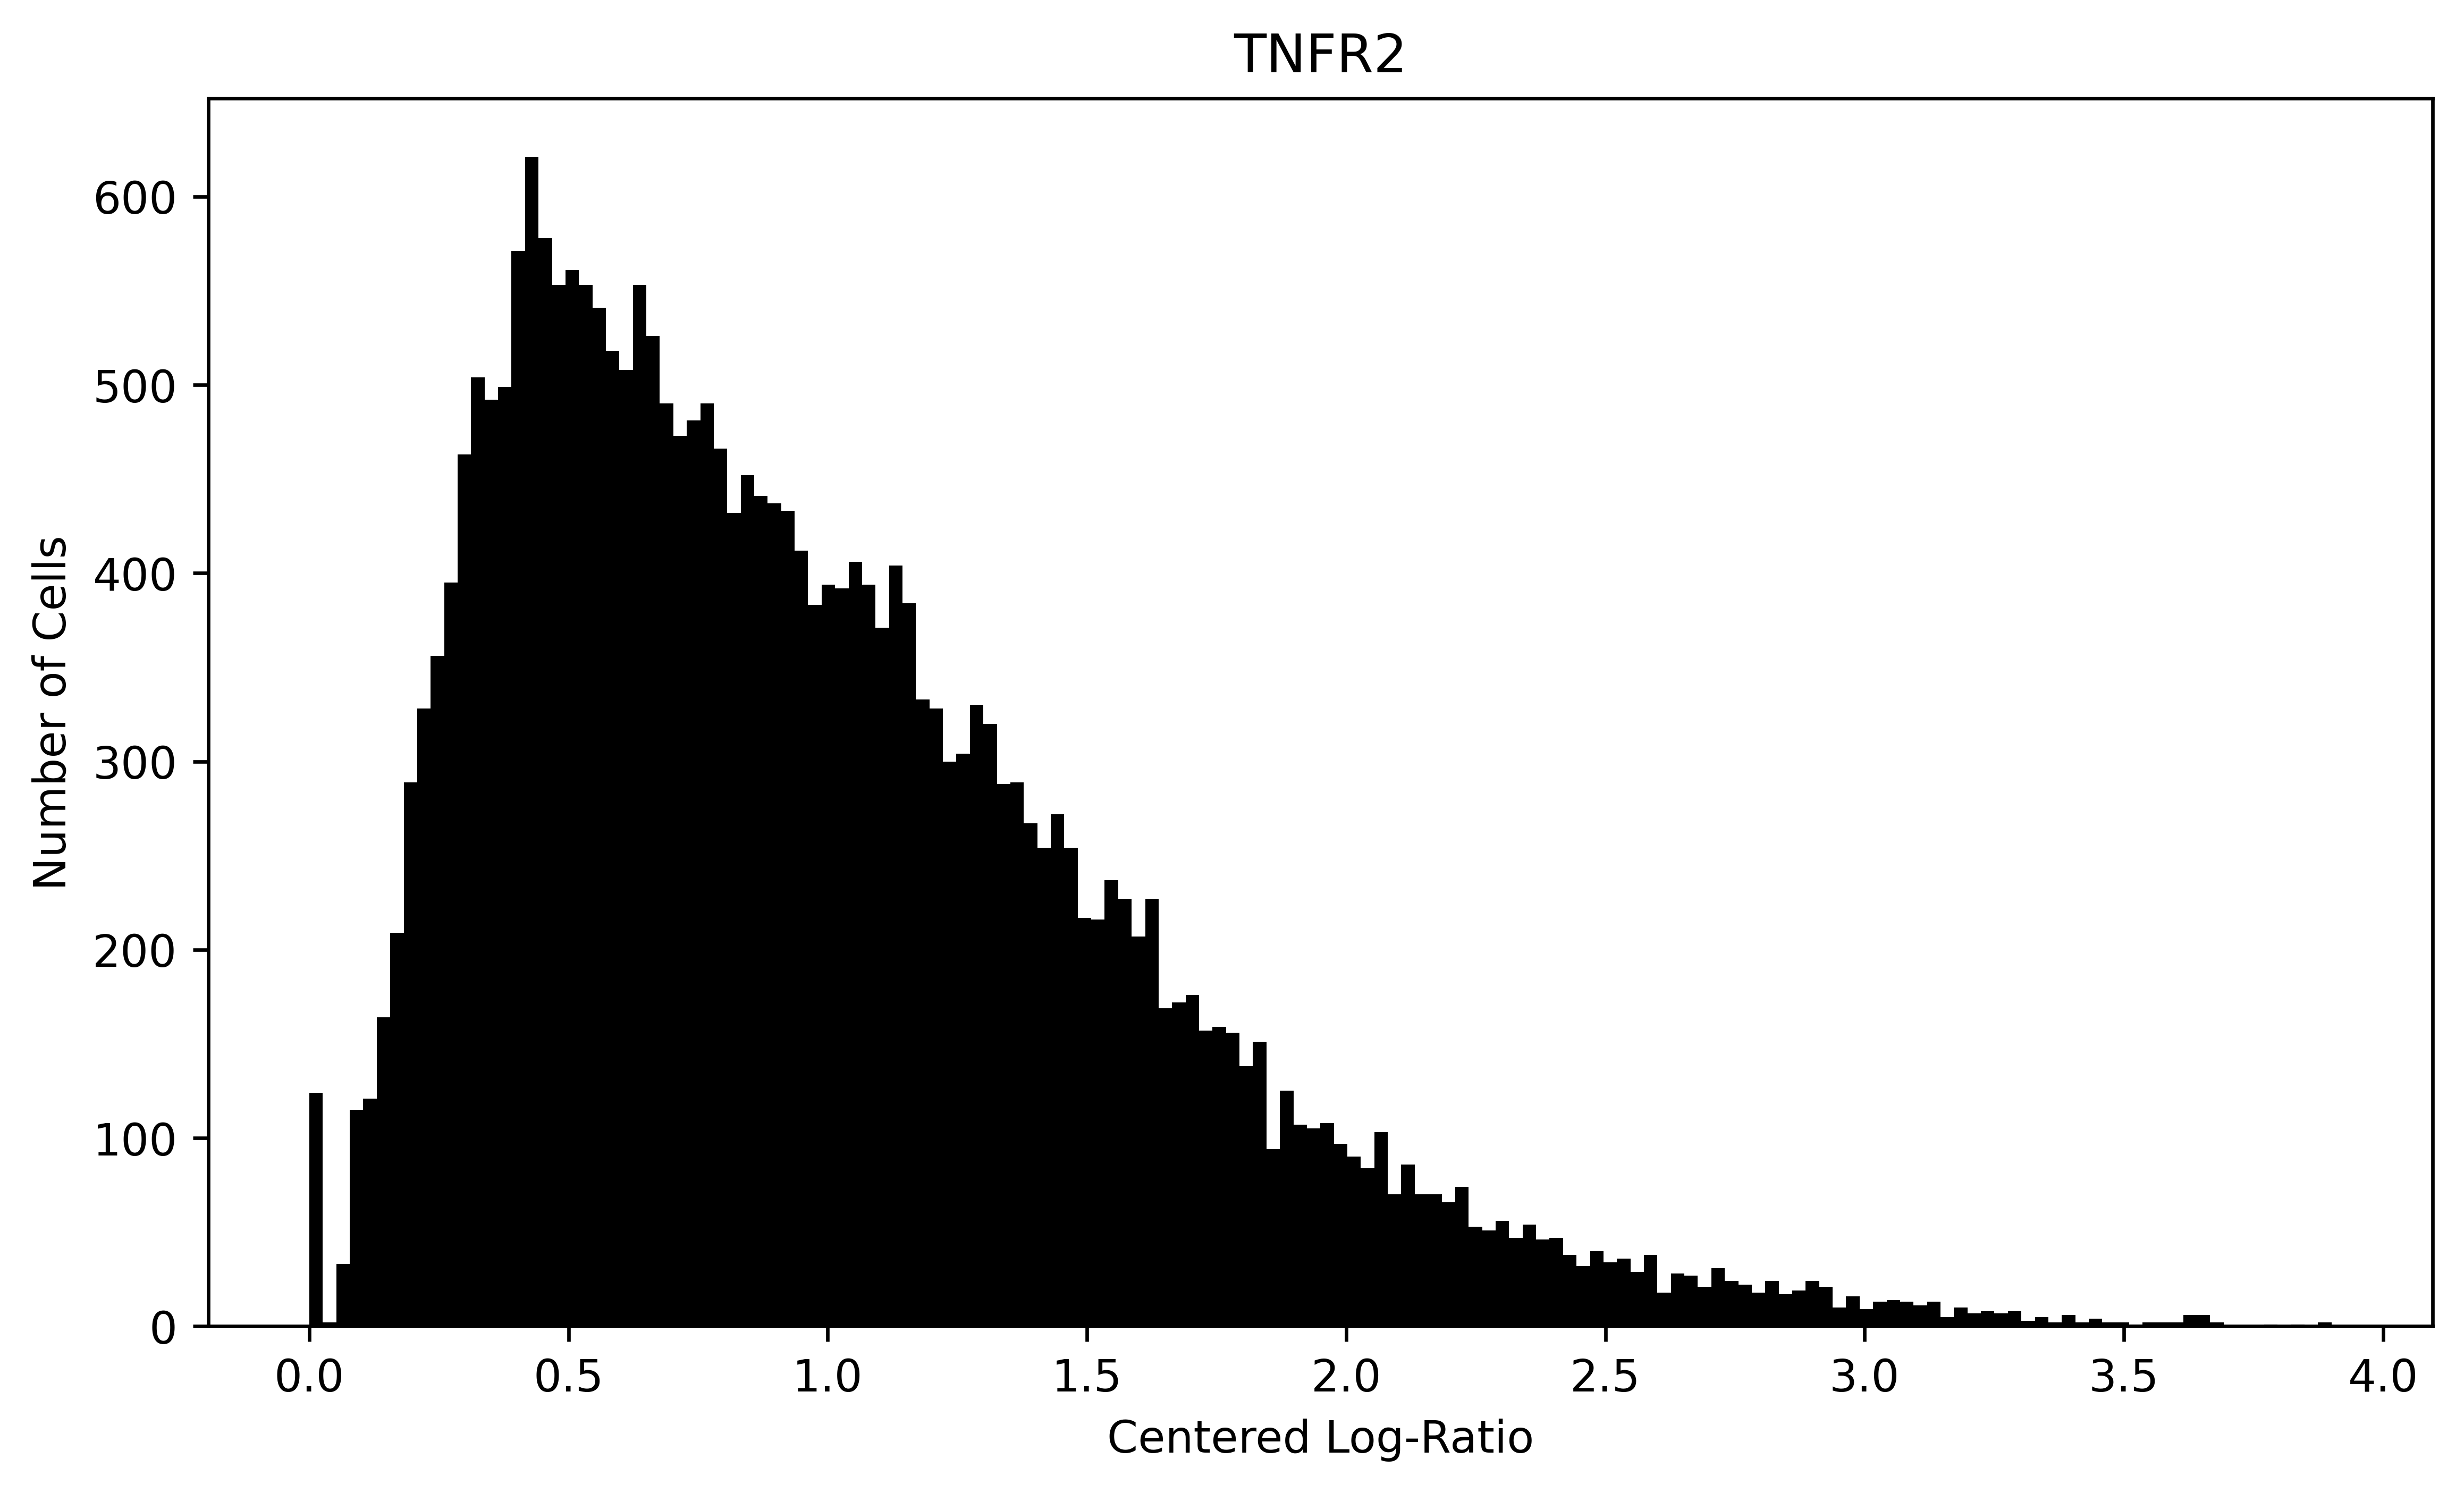

In [28]:
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('TNFR2')
plt.hist(ta['TNFR2'], n_bins, color='black')
plt.xlabel('Centered Log-Ratio')
plt.ylabel('Number of Cells')
plt.show()

/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_47173/3904962688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta['TNFR2'] = (ta['TNFR2'] - ta['TNFR2'].min()) / (ta['TNFR2'].max() - ta['TNFR2'].min())


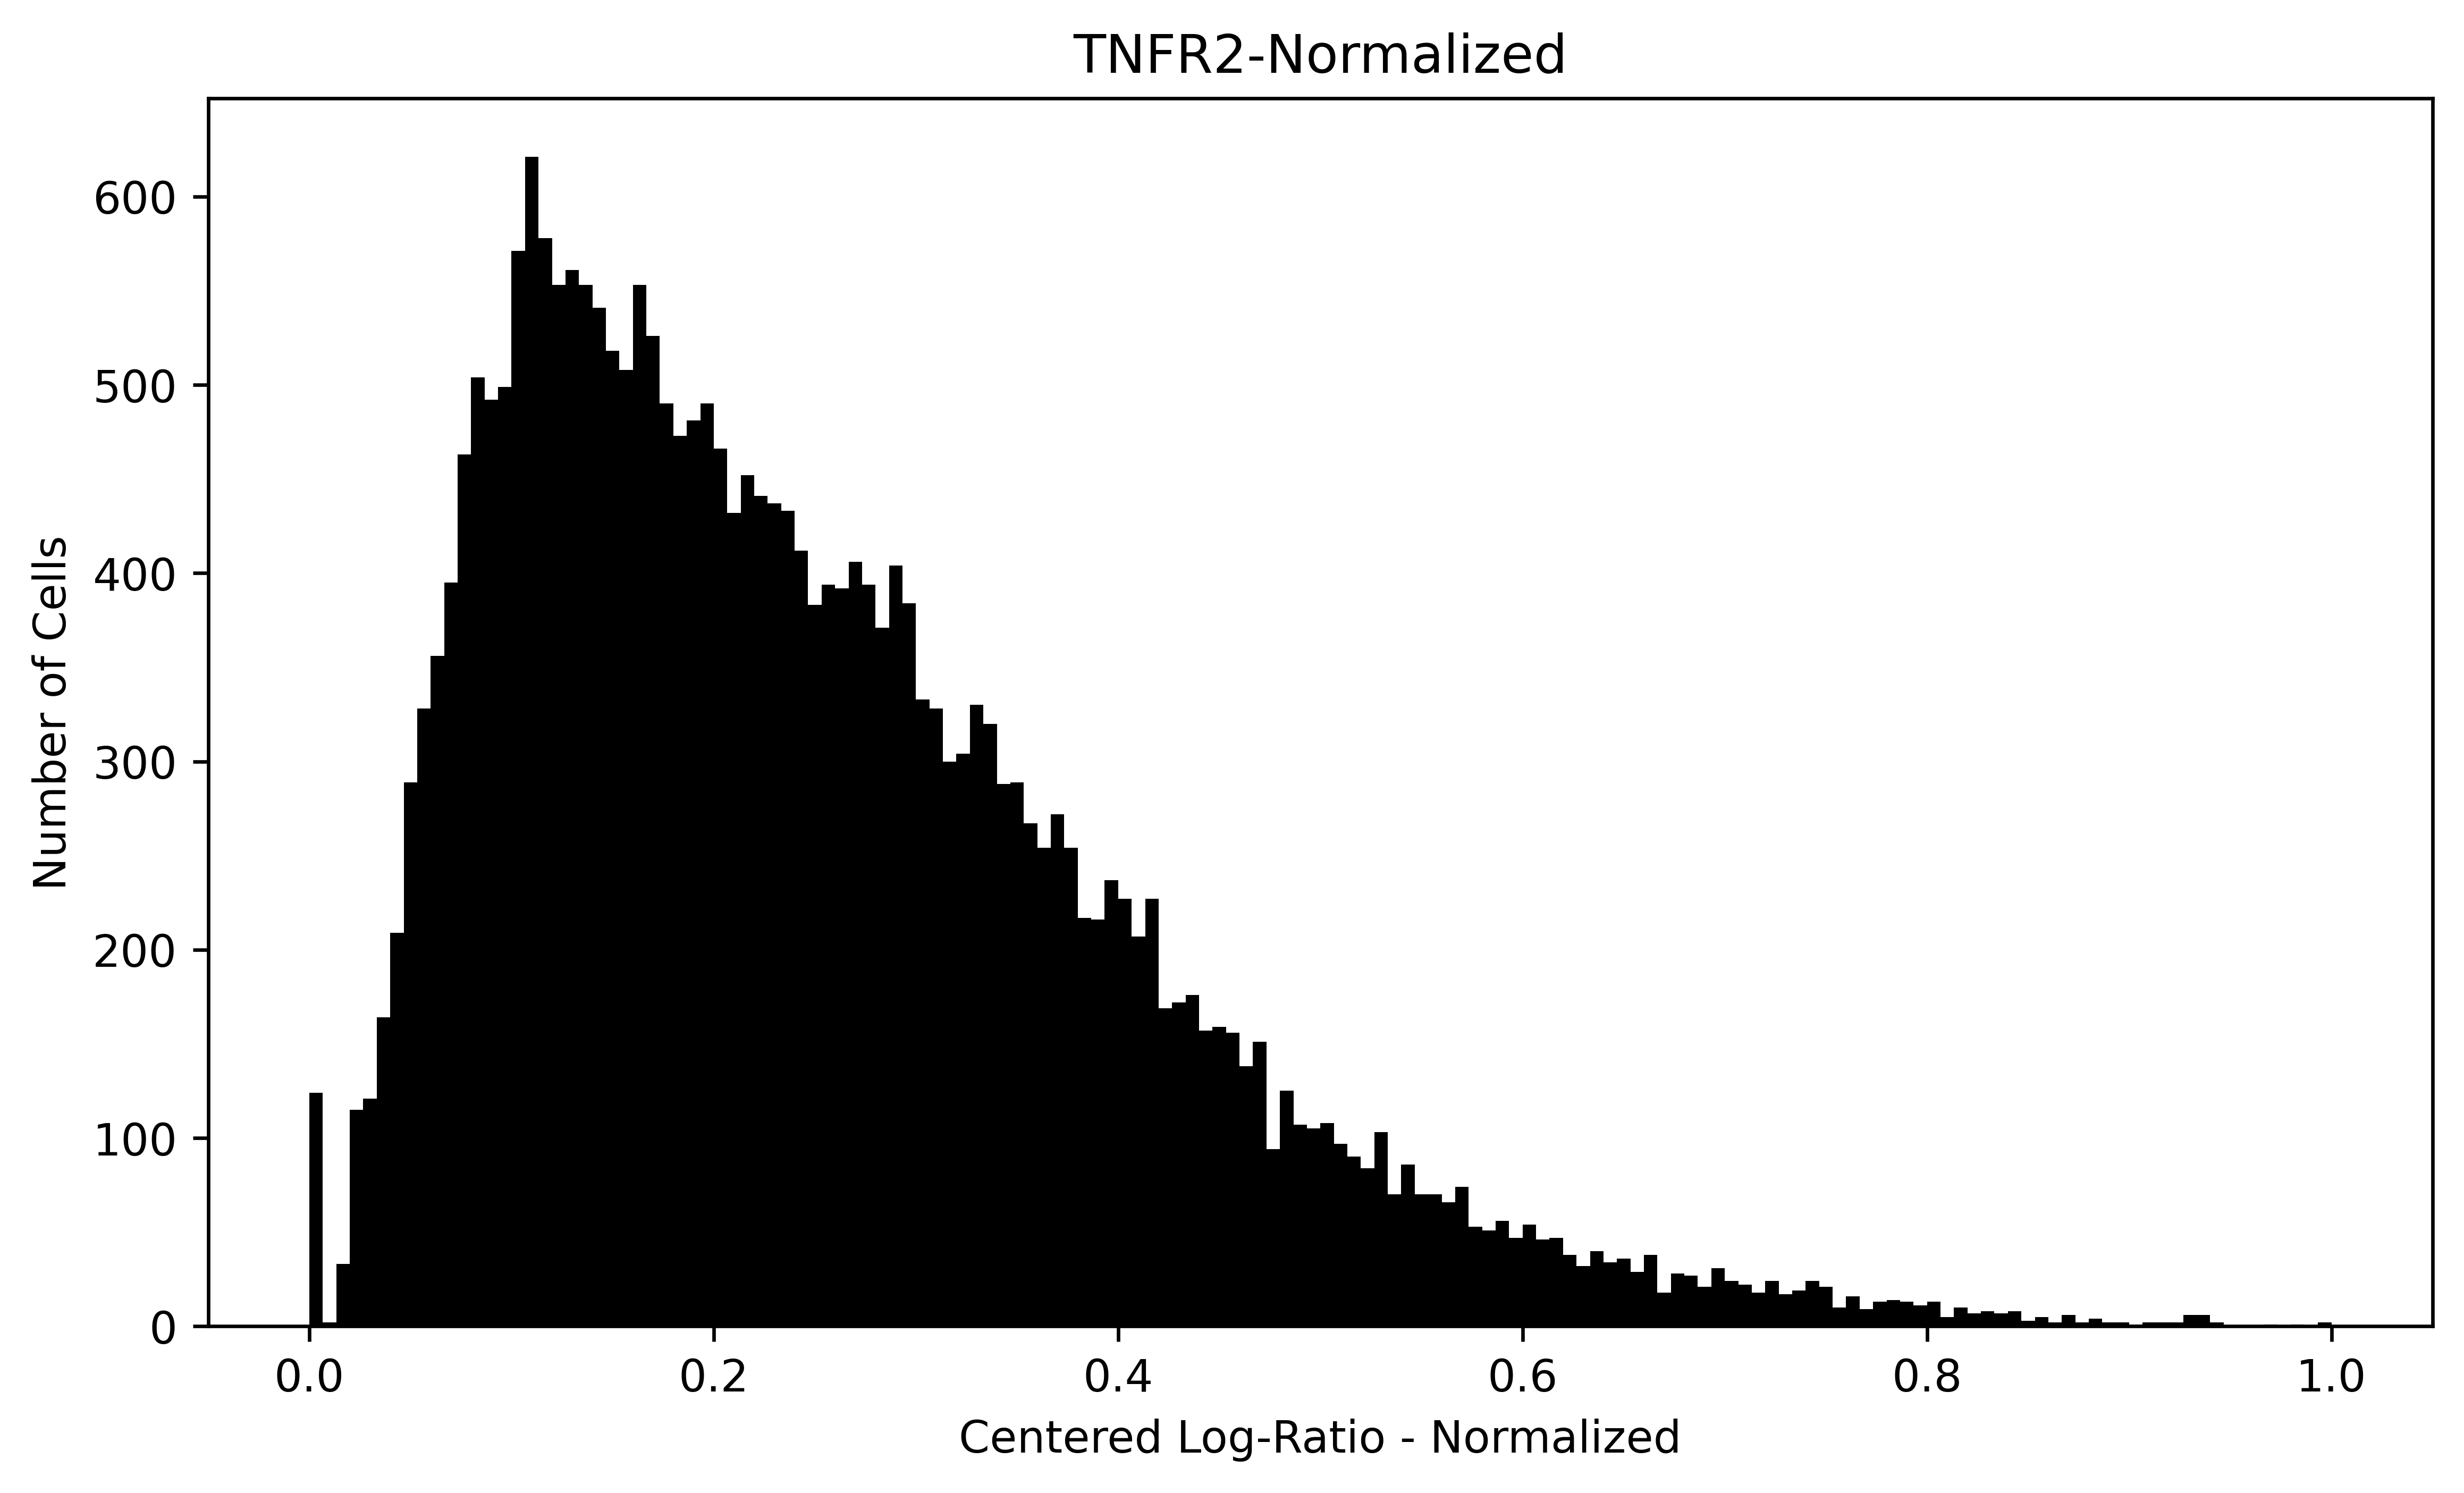

In [29]:
ta['TNFR2'] = (ta['TNFR2'] - ta['TNFR2'].min()) / (ta['TNFR2'].max() - ta['TNFR2'].min())
plt.figure(figsize=(9,5), dpi=600)
n_bins = 150
plt.title('TNFR2-Normalized')
plt.hist(ta['TNFR2'], n_bins, color='black')
plt.xlabel('Centered Log-Ratio - Normalized')
plt.ylabel('Number of Cells')
plt.show()

In [30]:
ta_ML = pd.get_dummies(ta, columns=['Cell Type','Group'], dtype=int)
ta_ML = ta_ML.drop(columns=["Sample"])
ta_ML

AUC TNFa     TNFR1  \
Cell_Index                                                               
Group_PBMCs_Sample_PBMCs 1_3794                     0.091300  0.191593   
Group_PBMCs_Sample_PBMCs 1_54922                    0.275973  0.171584   
Group_PBMCs_Sample_PBMCs 1_68296                    0.013205  0.105344   
Group_PBMCs_Sample_PBMCs 1_97680                    0.129458  0.103386   
Group_PBMCs_Sample_PBMCs 1_121103                   0.079261  0.188258   
...                                                      ...       ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.097353  0.137749   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.003334  0.108886   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.053046  0.088404   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.045472  0.163530   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.065344  0.205402   

                                                       TNFR2  \
Cell_Index                                                     
Group_PBMCs_Sample_PBMCs 1_3794                     0.323740   
Group_PBMCs_Sample_PBMCs 1_54922                    0.500314   
Group_PBMCs_Sample_PBMCs 1_68296                    0.526733   
Group_PBMCs_Sample_PBMCs 1_97680                    0.355547   
Group_PBMCs_Sample_PBMCs 1_121103                   0.338579   
...                                                      ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.073989   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.147625   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.051913   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.134514   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...  0.170906   

                                                    Cell Type_B-cells  \
Cell_Index                                                              
Group_PBMCs_Sample_PBMCs 1_3794                                     0   
Group_PBMCs_Sample_PBMCs 1_54922                                    0   
Group_PBMCs_Sample_PBMCs 1_68296                                    0   
Group_PBMCs_Sample_PBMCs 1_97680                                    0   
Group_PBMCs_Sample_PBMCs 1_121103                                   0   
...                                                               ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                  0   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                  0   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                  0   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                  1   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                  0   

                                                    Cell Type_CD16bright NK-cells  \
Cell_Index                                                                          
Group_PBMCs_Sample_PBMCs 1_3794                                                 0   
Group_PBMCs_Sample_PBMCs 1_54922                                                0   
Group_PBMCs_Sample_PBMCs 1_68296                                                1   
Group_PBMCs_Sample_PBMCs 1_97680                                                1   
Group_PBMCs_Sample_PBMCs 1_121103                                               1   
...                                                                           ...   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                              0   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                              0   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                              0   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                              0   
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_...                              0   

                                                    Cell Type_CD16dim NK-cells  \
Cell_Index                                                                       
Group_PBMCs_Sample_PBMCs 1_3794     

In [31]:
fig, ax = plt.subplots(figsize=(25,20), dpi=600)      
ax = sns.heatmap(ta_ML.corr().sort_values(by=['AUC TNFa'],
                                          ascending=False, axis=0).sort_values(by=['AUC TNFa'], 
                                                                               ascending=False, axis=1),
                 cmap="bwr",
                 annot=True)
plt.savefig('Threshold Analysis Correlation.png', bbox_inches='tight')

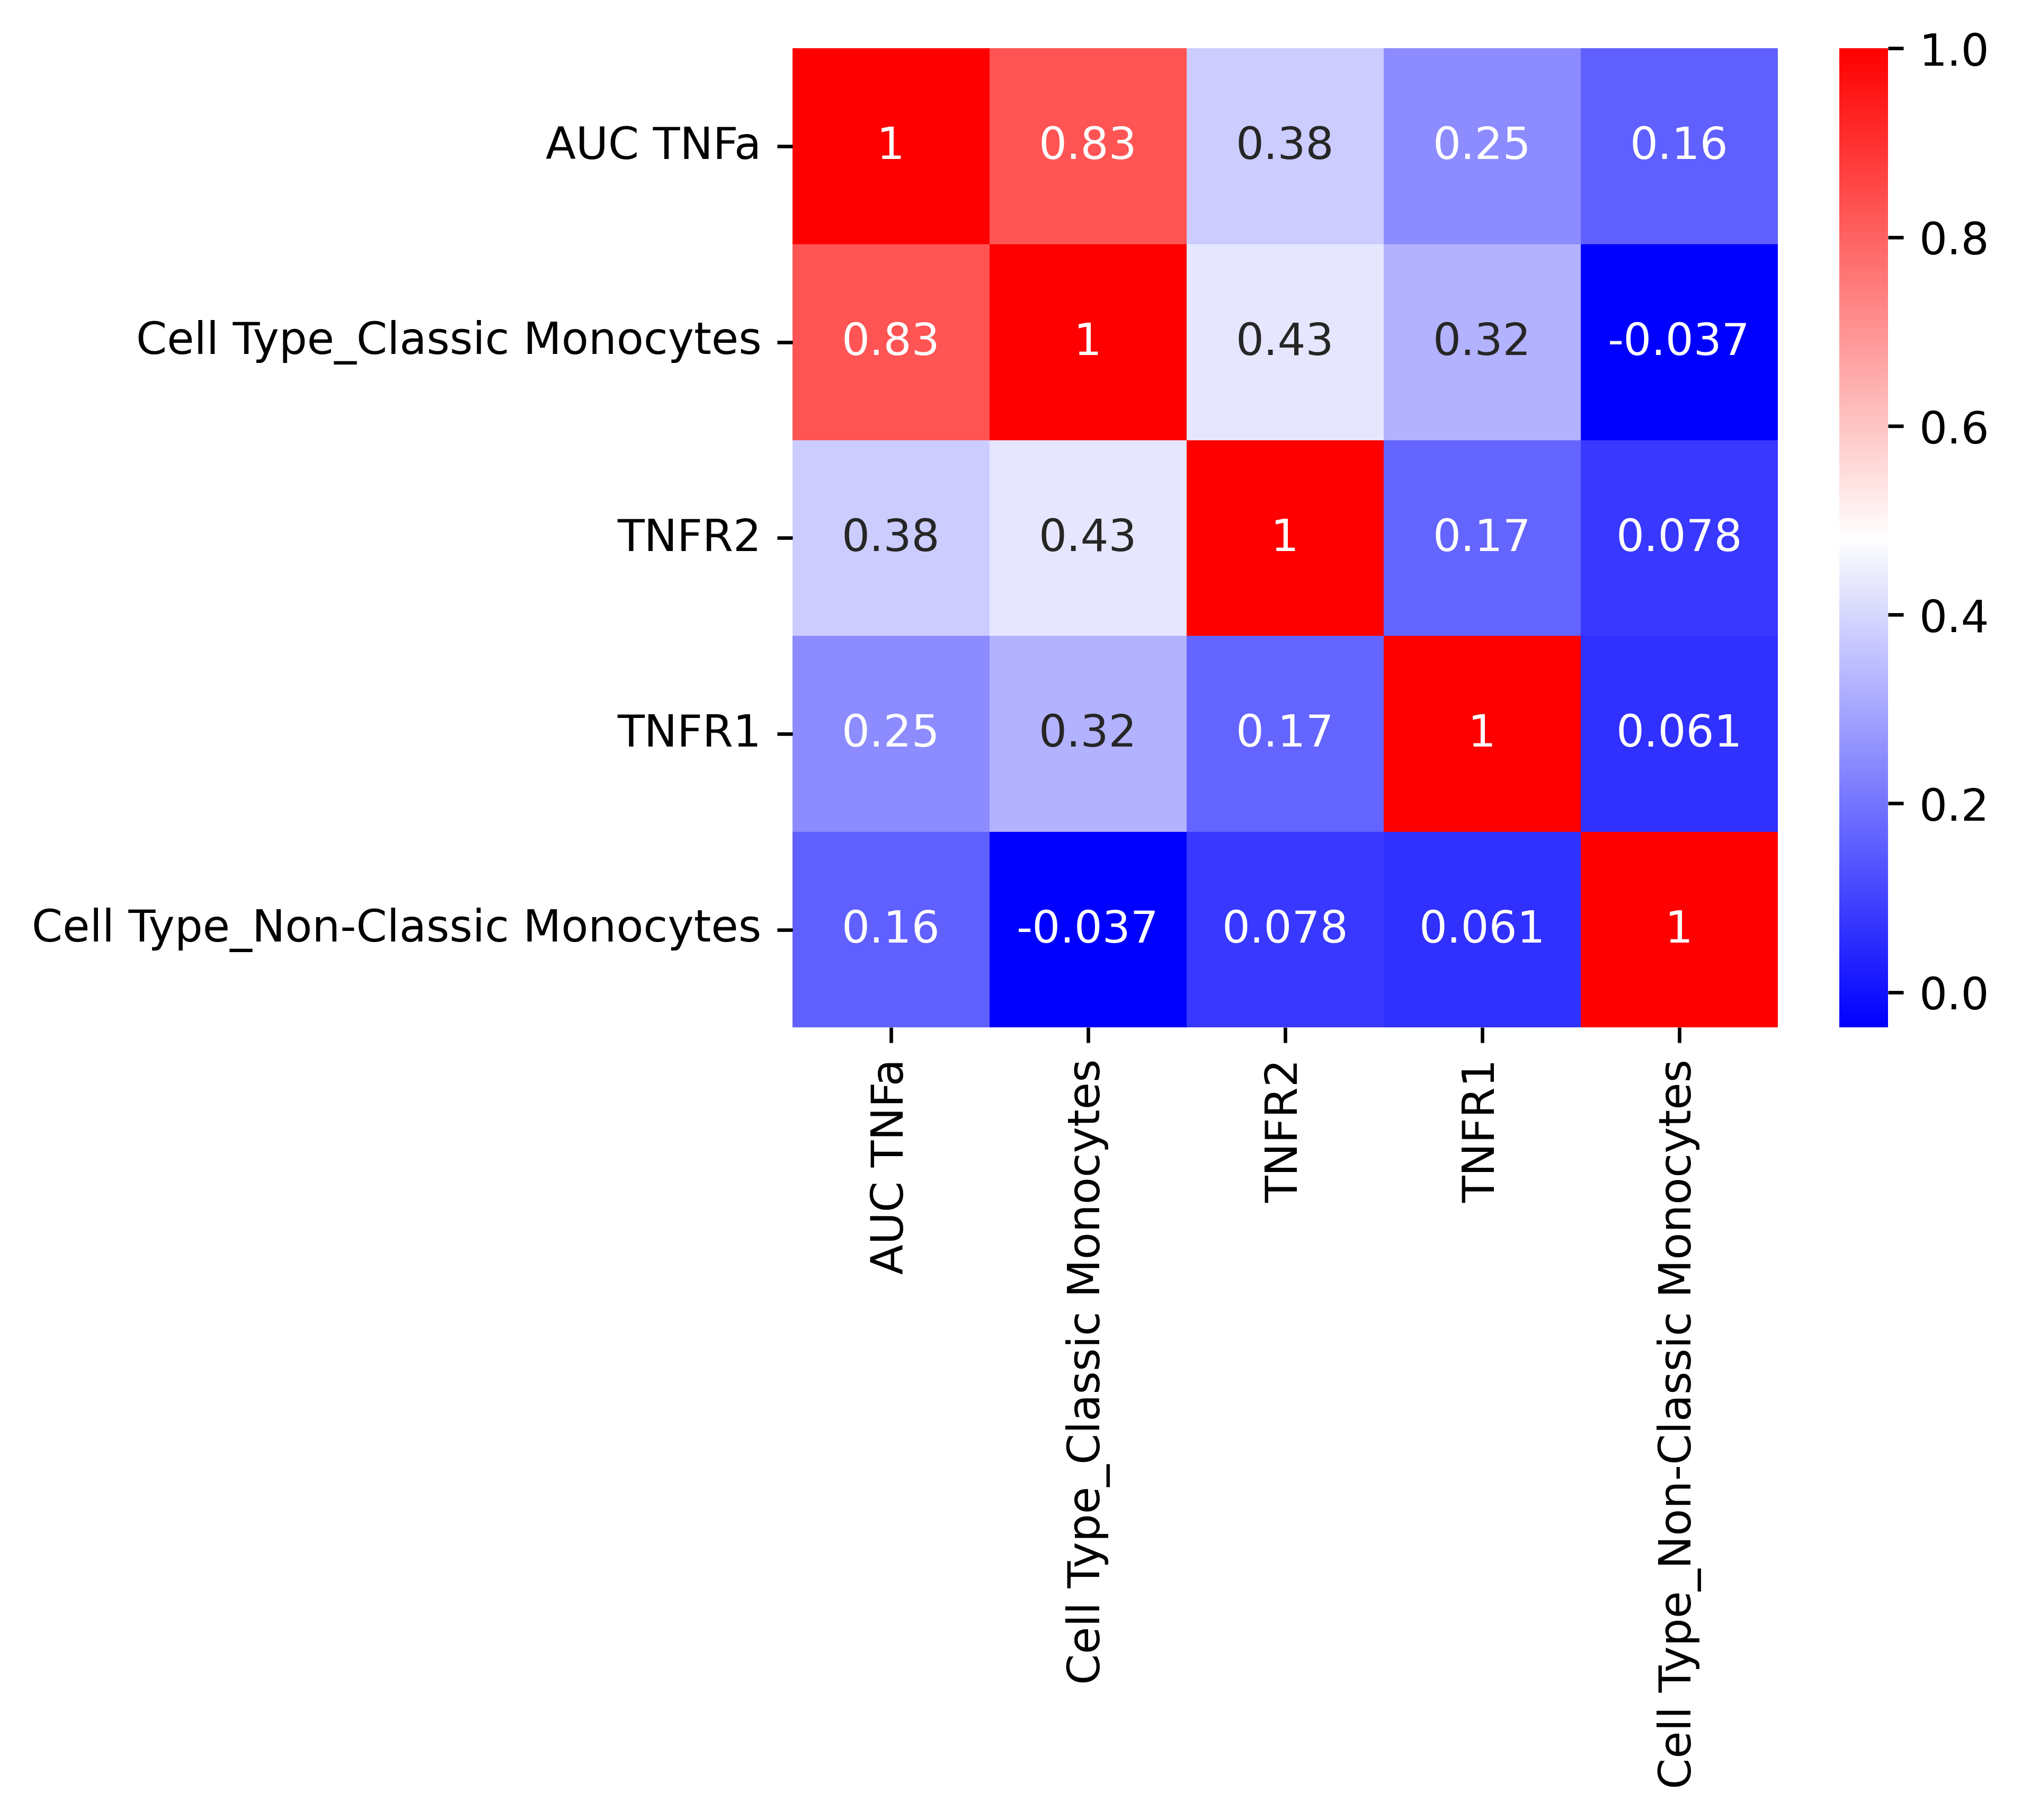

In [32]:
ta_ML_corr = ta_ML[['AUC TNFa','TNFR1','TNFR2','Cell Type_Classic Monocytes','Cell Type_Non-Classic Monocytes']]

fig, ax = plt.subplots(figsize=(5,4), dpi=600)      
ax = sns.heatmap(ta_ML_corr.corr().sort_values(by=['AUC TNFa'], 
                                          ascending=False, axis=0).sort_values(by=['AUC TNFa'], 
                                                                               ascending=False, axis=1),
                 cmap="bwr",
                 annot=True)
plt.savefig('Threshold Analysis Main Correlations.png', bbox_inches='tight')